In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [5]:
df = pd.read_csv("../data/total_df.csv", index_col="Unnamed: 0")

In [6]:
df.sample()

id_web        lat       long  \
132136  358302  49.585998  17.253464   

                                                  comment language  sentiment  \
132136  I love my husband Ash so much. They are litera...       en     0.9042   

        type_sentiment  characters  emotionality country_name  ...  \
132136               3          69      0.023185      Czechia  ...   

       mean_literacy mean_ARV_coverage mean_health_exp  mean_UHC_coverage  \
132136      96.08594         68.466667        6.320851          80.111111   

        mean_rights  mean_sex_index             censor  \
132136     2.499225        0.155437  01. No censorship   

                             transition  mean_hate_protection  cluster  
132136  02. Legal, but requires surgery              0.333333      1.0  

[1 rows x 30 columns]

In [7]:
df.columns

Index(['id_web', 'lat', 'long', 'comment', 'language', 'sentiment',
       'type_sentiment', 'characters', 'emotionality', 'country_name',
       'country_code', 'region', 'income_group', 'mean_stability', 'mean_law',
       'mean_female_seats', 'mean_voice', 'mean_gdp', 'mean_children_out',
       'mean_ed_exp', 'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp',
       'mean_UHC_coverage', 'mean_rights', 'mean_sex_index', 'censor',
       'transition', 'mean_hate_protection', 'cluster'],
      dtype='object')

# Discourse by mean_stability:
**Low corr, high significance**

## Discourse as sentiment

Low negative corr, but high significance.

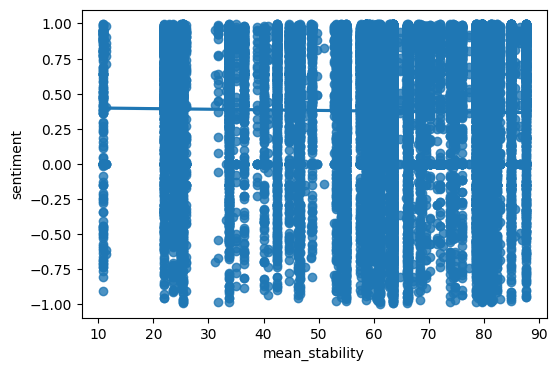

In [112]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_stability, fit_reg=True);

In [113]:
df[["sentiment", "mean_stability"]].corr()

sentiment  mean_stability
sentiment        1.000000       -0.015461
mean_stability  -0.015461        1.000000

In [114]:
results = smf.ols("sentiment ~ mean_stability", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_stability    0.000238
 dtype: float64,
 Intercept         0.402323
 mean_stability   -0.000425
 dtype: float64)

## Discourse as type_sentiment

Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

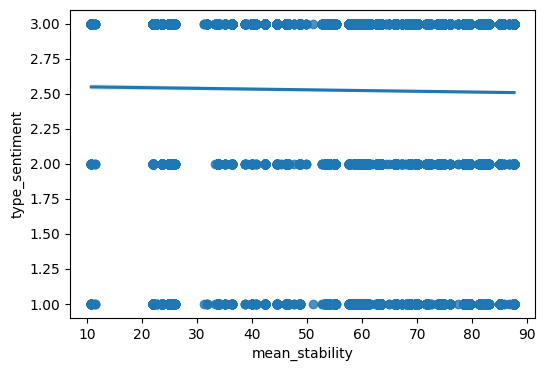

In [115]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_stability, fit_reg=True);

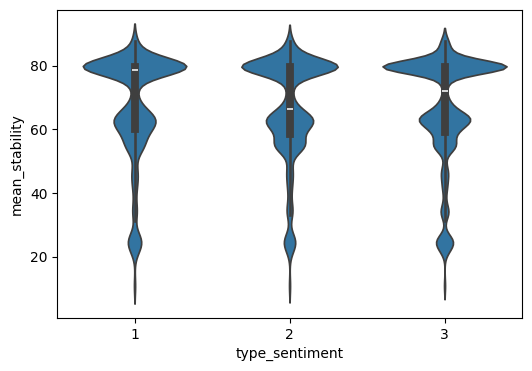

In [116]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_stability);

In [117]:
group1 = df[["mean_stability"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_stability"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_stability"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([6.00402096]), array([0.00247038]))

In [119]:
results = smf.mnlogit("type_sentiment ~ mean_stability", data = df[["type_sentiment", "mean_stability"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.860404
         Iterations 5


(                           0              1
 Intercept       2.475825e-07  5.782959e-245
 mean_stability  3.639696e-03   8.160219e-04,
                        0         1
 Intercept       0.308784  1.637578
 mean_stability -0.002527 -0.002375)

## Discourse as emotionality

Low negative corr, but high significance.

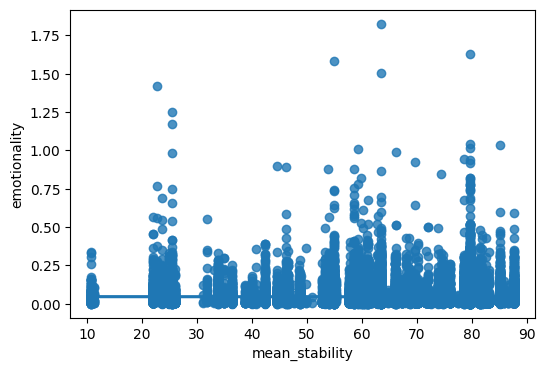

In [120]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_stability, fit_reg=True);

In [121]:
df[["emotionality", "mean_stability"]].corr()

emotionality  mean_stability
emotionality        1.000000       -0.003962
mean_stability     -0.003962        1.000000

In [122]:
results = smf.ols("emotionality ~ mean_stability", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_stability    0.346364
 dtype: float64,
 Intercept         0.046340
 mean_stability   -0.000013
 dtype: float64)

# Discourse by mean_law

## Discourse as sentiment

Low negative corr, but high significance.

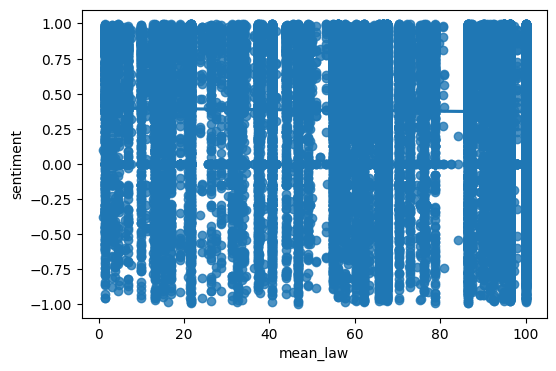

In [123]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_law, fit_reg=True);

In [124]:
df[["sentiment", "mean_law"]].corr()

sentiment  mean_law
sentiment   1.000000 -0.015966
mean_law   -0.015966  1.000000

In [125]:
results = smf.ols("sentiment ~ mean_law", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.000024
 dtype: float64,
 Intercept    0.398039
 mean_law    -0.000284
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

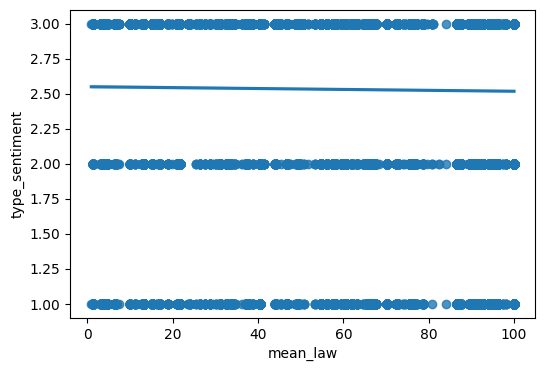

In [126]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_law, fit_reg=True);

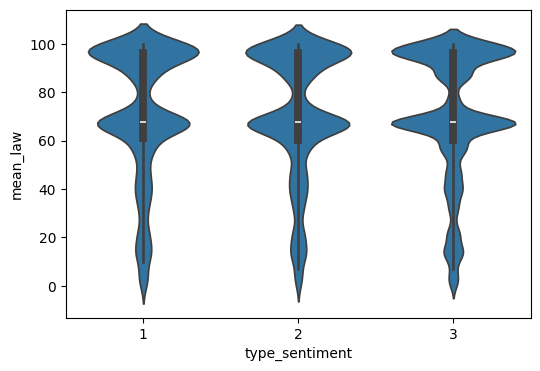

In [127]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_law);

In [128]:
group1 = df[["mean_law"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_law"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_law"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([4.8774949]), array([0.00761866]))

In [130]:
results = smf.mnlogit("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851638
         Iterations 5


(                      0        1
 Intercept  7.009181e-07  0.00000
 mean_law   6.160901e-02  0.00186,
                   0         1
 Intercept  0.191945  1.590391
 mean_law  -0.000955 -0.001285)

In [129]:
results = smf.ols("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.002451
 dtype: float64,
 Intercept    2.549065
 mean_law    -0.000324
 dtype: float64)

## Discourse as emotionality
Low negative corr, but high significance.

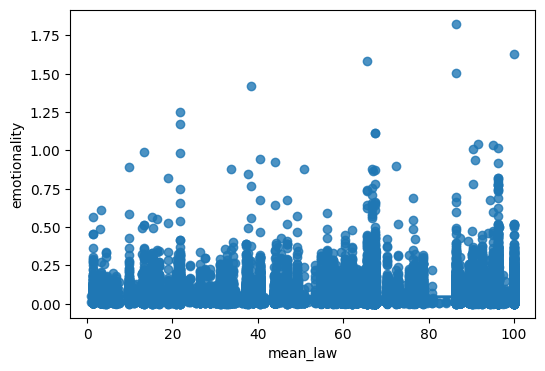

In [131]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_law, fit_reg=True);

In [132]:
df[["emotionality", "mean_law"]].corr()

emotionality  mean_law
emotionality      1.000000 -0.005165
mean_law         -0.005165  1.000000

In [133]:
results = smf.ols("emotionality ~ mean_law", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.172223
 dtype: float64,
 Intercept    0.045564
 mean_law    -0.000011
 dtype: float64)

# Discourse by mean_female_seats

## Discourse as sentiment
Low negative corr, but significant.

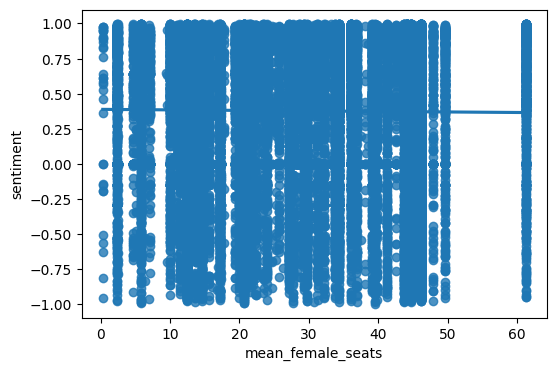

In [135]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_female_seats, fit_reg=True);

In [136]:
df[["sentiment", "mean_female_seats"]].corr()

sentiment  mean_female_seats
sentiment           1.000000          -0.011651
mean_female_seats  -0.011651           1.000000

In [137]:
results = smf.ols("sentiment ~ mean_female_seats", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_female_seats    0.002097
 dtype: float64,
 Intercept            0.388616
 mean_female_seats   -0.000371
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

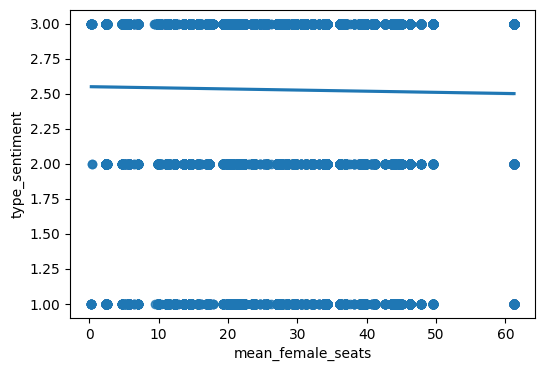

In [140]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_female_seats, fit_reg=True);

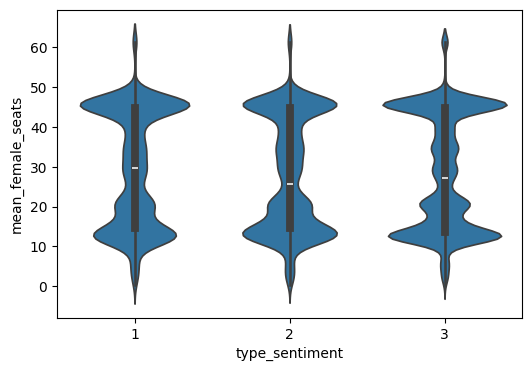

In [141]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_female_seats);

In [142]:
group1 = df[["mean_female_seats"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_female_seats"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_female_seats"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([31.92705298]), array([1.38230638e-14]))

In [149]:
results = smf.mnlogit("type_sentiment ~ mean_female_seats", data = df[["type_sentiment", "mean_female_seats"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851275
         Iterations 5


(                              0             1
 Intercept          2.829481e-29  0.000000e+00
 mean_female_seats  3.476116e-15  6.676732e-10,
                           0         1
 Intercept          0.331264  1.631099
 mean_female_seats -0.007169 -0.004522)

## Discourse as emotionality
Low **positive** corr, but high significance.

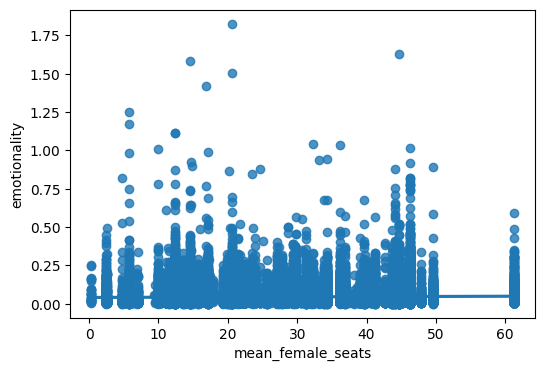

In [145]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_female_seats, fit_reg=True);

In [146]:
df[["emotionality", "mean_female_seats"]].corr()

emotionality  mean_female_seats
emotionality           1.000000           0.034197
mean_female_seats      0.034197           1.000000

In [147]:
results = smf.ols("emotionality ~ mean_female_seats", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000e+00
 mean_female_seats    1.697854e-19
 dtype: float64,
 Intercept            0.041037
 mean_female_seats    0.000130
 dtype: float64)

# Discourse by mean_voice

## Discourse as sentiment
Low negative corr, but high significance.

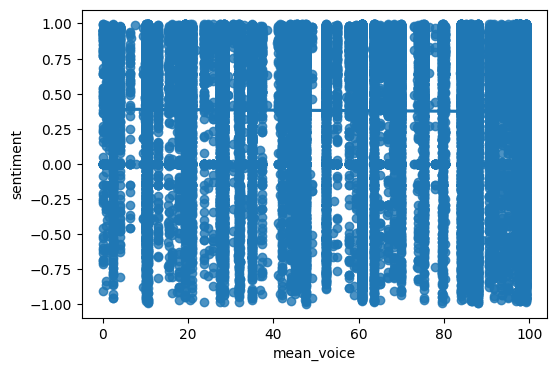

In [151]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_voice, fit_reg=True);

In [152]:
df[["sentiment", "mean_voice"]].corr()

sentiment  mean_voice
sentiment    1.000000   -0.011666
mean_voice  -0.011666    1.000000

In [153]:
results = smf.ols("sentiment ~ mean_voice", data = df).fit()
results.pvalues, results.params

(Intercept     0.000000
 mean_voice    0.002048
 dtype: float64,
 Intercept     0.390386
 mean_voice   -0.000184
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

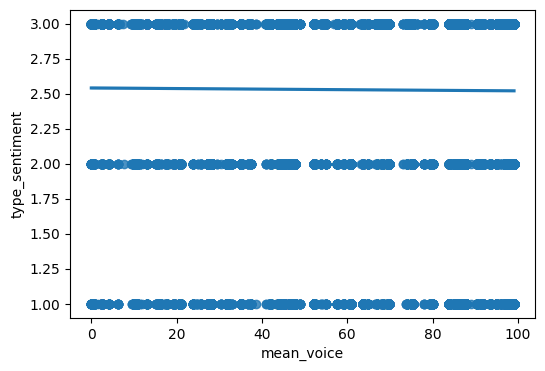

In [154]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_voice, fit_reg=True);

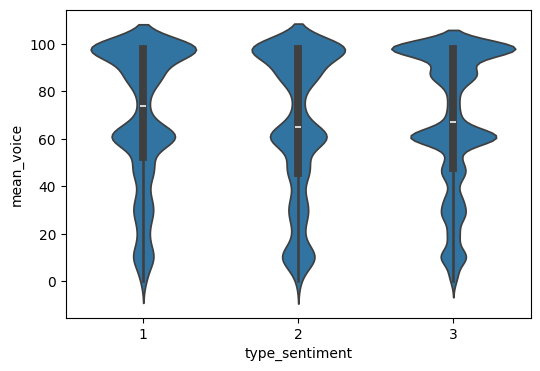

In [155]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_voice);

In [156]:
group1 = df[["mean_voice"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_voice"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_voice"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([32.28975032]), array([9.62096756e-15]))

In [157]:
results = smf.mnlogit("type_sentiment ~ mean_voice", data = df[["type_sentiment", "mean_voice"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851247
         Iterations 5


(                       0         1
 Intercept   3.628914e-28  0.000000
 mean_voice  1.733956e-15  0.000005,
                    0         1
 Intercept   0.365999  1.613642
 mean_voice -0.003590 -0.001676)

## Discourse as emotionality
**Positive** corr, but high significance.

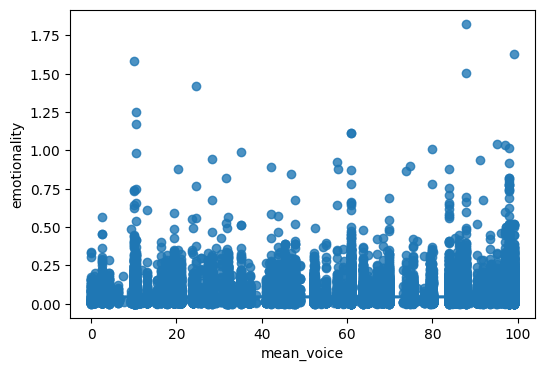

In [158]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_voice, fit_reg=True);

In [159]:
df[["emotionality", "mean_voice"]].corr()

emotionality  mean_voice
emotionality      1.000000    0.001798
mean_voice        0.001798    1.000000

In [160]:
results = smf.ols("emotionality ~ mean_voice", data = df).fit()
results.pvalues, results.params

(Intercept     0.000000
 mean_voice    0.634681
 dtype: float64,
 Intercept     0.044556
 mean_voice    0.000003
 dtype: float64)

# Discourse by mean_gdp

## Discourse as sentiment
Low negative corr, but high significance.

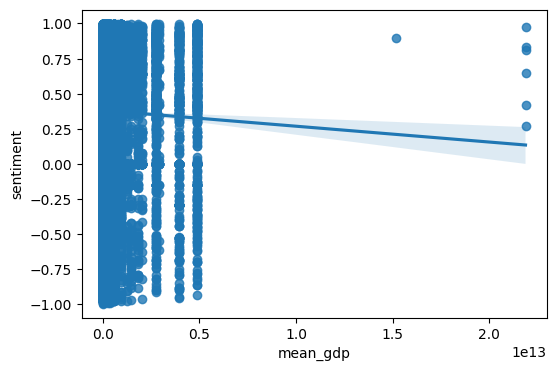

In [163]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_gdp, fit_reg=True);
# Very high mean_gdp has much less comments (Fiji), as the goal is not predicting but describing, I let these models be with outliers

In [164]:
df[["sentiment", "mean_gdp"]].corr()

sentiment  mean_gdp
sentiment   1.000000 -0.015109
mean_gdp   -0.015109  1.000000

In [165]:
results = smf.ols("sentiment ~ mean_gdp", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_gdp     0.000066
 dtype: float64,
 Intercept    3.813419e-01
 mean_gdp    -1.127777e-14
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

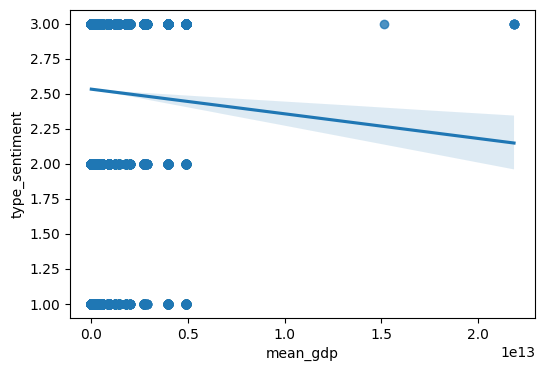

In [166]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_gdp, fit_reg=True);

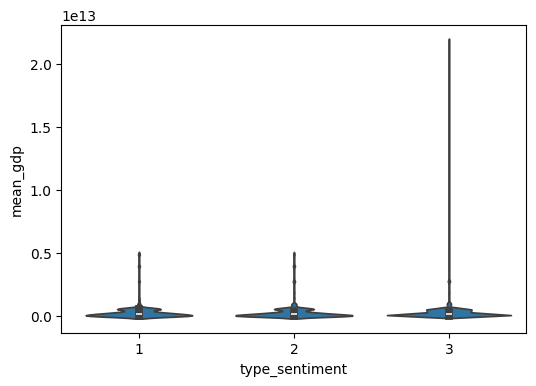

In [167]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_gdp);
# Extremely high GDP have only positive sentiment

In [168]:
group1 = df[["mean_gdp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_gdp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_gdp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([7.99758584]), array([0.00033658]))

In [169]:
results = smf.mnlogit("type_sentiment ~ mean_gdp", data = df[["type_sentiment", "mean_gdp"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851569
         Iterations 5


(                      0         1
 Intercept  1.664634e-20  0.000000
 mean_gdp   3.682665e-02  0.000077,
                       0             1
 Intercept  1.368298e-01  1.518498e+00
 mean_gdp  -4.161472e-14 -6.248903e-14)

In [170]:
results = smf.ols("type_sentiment ~ mean_gdp", data = df[["type_sentiment", "mean_gdp"]]).fit()
results.pvalues, results.params

(Intercept    0.00000
 mean_gdp     0.00009
 dtype: float64,
 Intercept    2.531502e+00
 mean_gdp    -1.758931e-14
 dtype: float64)

## Discourse as emotionality
Very low **positive** corr, but high significance.

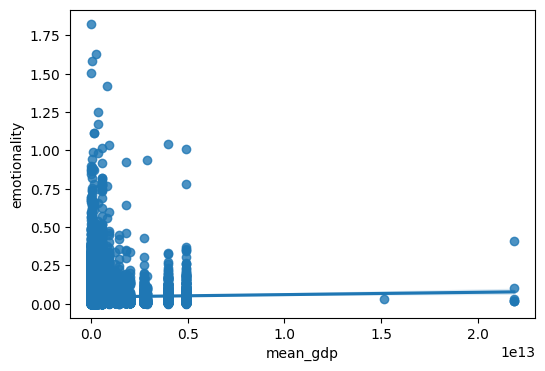

In [171]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_gdp, fit_reg=True);

In [172]:
df[["emotionality", "mean_gdp"]].corr()

emotionality  mean_gdp
emotionality      1.000000  0.016878
mean_gdp          0.016878  1.000000

In [173]:
results = smf.ols("emotionality ~ mean_gdp", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_gdp     0.000008
 dtype: float64,
 Intercept    4.432484e-02
 mean_gdp     1.513433e-15
 dtype: float64)

# Discourse by mean_children_out

## Discourse as sentiment
Low **positive** corr, but high significance.

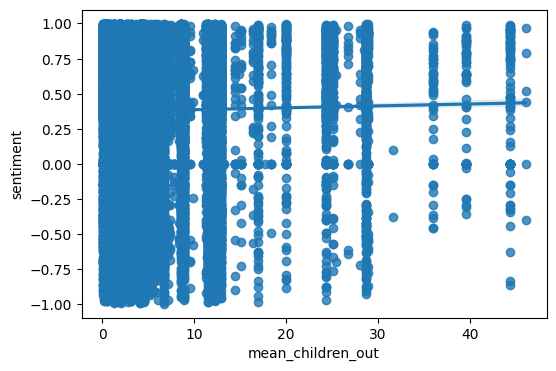

In [174]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_children_out, fit_reg=True);

In [175]:
df[["sentiment", "mean_children_out"]].corr()

sentiment  mean_children_out
sentiment           1.000000           0.013947
mean_children_out   0.013947           1.000000

In [176]:
results = smf.ols("sentiment ~ mean_children_out", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_children_out    0.000233
 dtype: float64,
 Intercept            0.372717
 mean_children_out    0.001353
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small **positive** correlation but high significance.

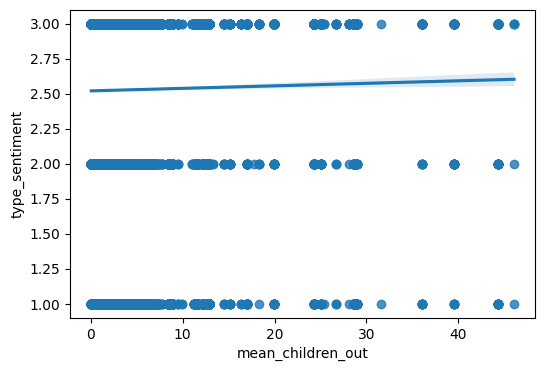

In [177]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_children_out, fit_reg=True);

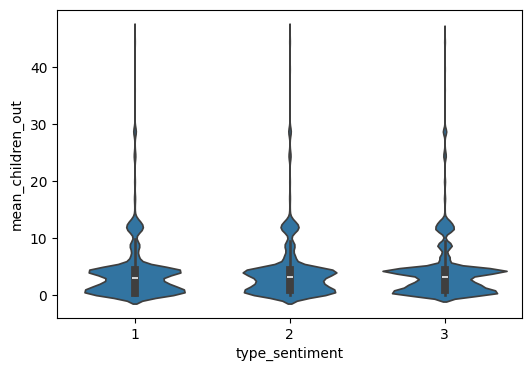

In [178]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_children_out);

In [179]:
group1 = df[["mean_children_out"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_children_out"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_children_out"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([5.25706154]), array([0.00521266]))

In [180]:
results = smf.mnlogit("type_sentiment ~ mean_children_out", data = df[["type_sentiment", "mean_children_out"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851286
         Iterations 5


(                              0         1
 Intercept          1.368086e-08  0.000000
 mean_children_out  3.087256e-02  0.001195,
                           0         1
 Intercept          0.099940  1.470251
 mean_children_out  0.006167  0.007551)

In [181]:
results = smf.ols("type_sentiment ~ mean_children_out", data = df[["type_sentiment", "mean_children_out"]]).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_children_out    0.002065
 dtype: float64,
 Intercept            2.519235
 mean_children_out    0.001801
 dtype: float64)

## Discourse as emotionality
Low **negative** corr, but high significance.

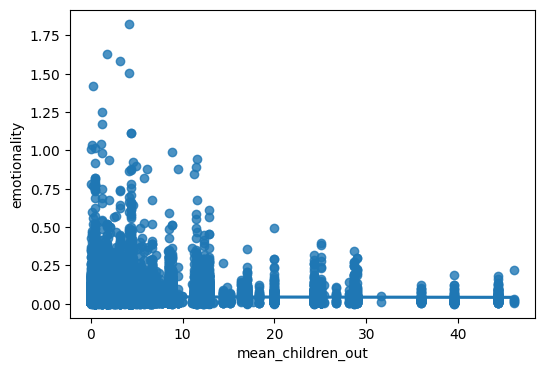

In [182]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_children_out, fit_reg=True);

In [183]:
df[["emotionality", "mean_children_out"]].corr()

emotionality  mean_children_out
emotionality           1.000000          -0.006477
mean_children_out     -0.006477           1.000000

In [184]:
results = smf.ols("emotionality ~ mean_children_out", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_children_out    0.087467
 dtype: float64,
 Intercept            0.045098
 mean_children_out   -0.000075
 dtype: float64)

# Discourse by mean_ed_exp

## Discourse as sentiment
Low negative corr, but high significance.

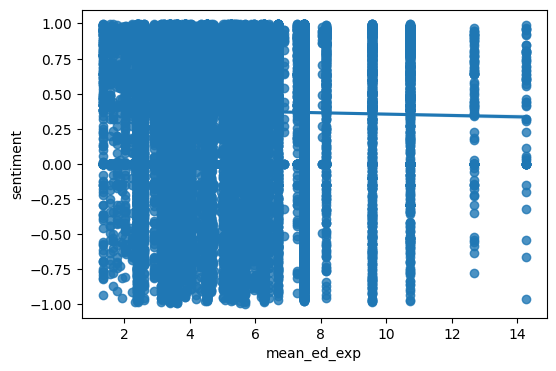

In [185]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_ed_exp, fit_reg=True);

In [186]:
df[["sentiment", "mean_ed_exp"]].corr()

sentiment  mean_ed_exp
sentiment     1.000000    -0.019101
mean_ed_exp  -0.019101     1.000000

In [187]:
results = smf.ols("sentiment ~ mean_ed_exp", data = df).fit()
results.pvalues, results.params

(Intercept      0.000000e+00
 mean_ed_exp    4.543465e-07
 dtype: float64,
 Intercept      0.402187
 mean_ed_exp   -0.004751
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

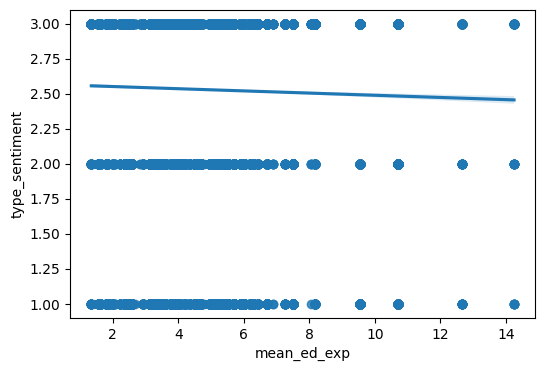

In [188]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_ed_exp, fit_reg=True);

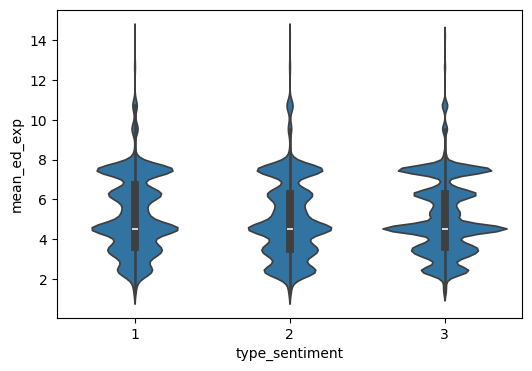

In [189]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_ed_exp);

In [190]:
group1 = df[["mean_ed_exp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_ed_exp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_ed_exp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([43.56997167]), array([1.22917536e-19]))

In [191]:
results = smf.mnlogit("type_sentiment ~ mean_ed_exp", data = df[["type_sentiment", "mean_ed_exp"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851011
         Iterations 5


(                        0             1
 Intercept    8.044877e-32  0.000000e+00
 mean_ed_exp  8.490129e-20  1.328112e-13,
                     0         1
 Intercept    0.454504  1.714944
 mean_ed_exp -0.064604 -0.041788)

## Discourse as emotionality
Low **positive** corr, but high significance.

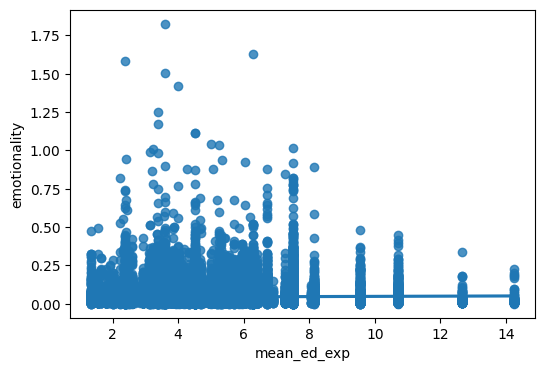

In [192]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_ed_exp, fit_reg=True);

In [193]:
df[["emotionality", "mean_ed_exp"]].corr()

emotionality  mean_ed_exp
emotionality      1.000000     0.022332
mean_ed_exp       0.022332     1.000000

In [194]:
results = smf.ols("emotionality ~ mean_ed_exp", data = df).fit()
results.pvalues, results.params

(Intercept      0.000000e+00
 mean_ed_exp    3.674422e-09
 dtype: float64,
 Intercept      0.041381
 mean_ed_exp    0.000667
 dtype: float64)

# Discourse by mean_literacy

## Discourse as sentiment
Low negative corr, but high significance.

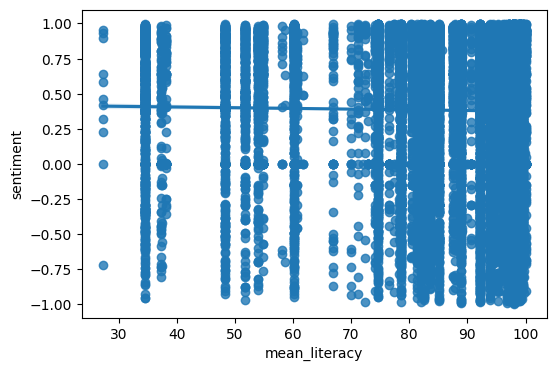

In [195]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_literacy, fit_reg=True);

In [196]:
df[["sentiment", "mean_literacy"]].corr()

sentiment  mean_literacy
sentiment       1.000000      -0.012093
mean_literacy  -0.012093       1.000000

In [197]:
results = smf.ols("sentiment ~ mean_literacy", data = df).fit()
results.pvalues, results.params

(Intercept        5.408706e-181
 mean_literacy     1.419674e-03
 dtype: float64,
 Intercept        0.425235
 mean_literacy   -0.000499
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative/positive correlation but significant.

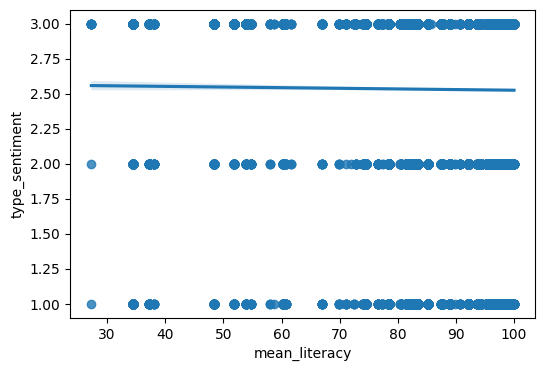

In [198]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_literacy, fit_reg=True);

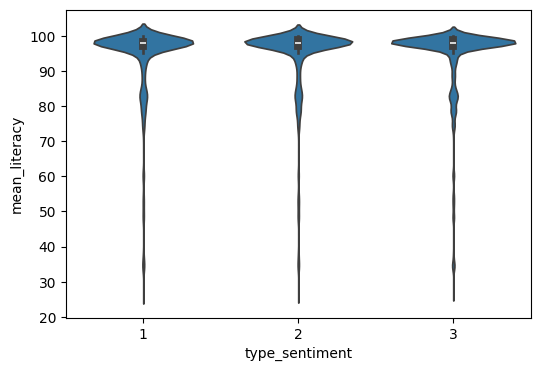

In [199]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_literacy);

In [200]:
group1 = df[["mean_literacy"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_literacy"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_literacy"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([5.98457528]), array([0.00251858]))

In [201]:
results = smf.mnlogit("type_sentiment ~ mean_literacy", data = df[["type_sentiment", "mean_literacy"]]).fit()
results.pvalues, results.params
# Not continuous (coef is positive for neutral, and negative for positive sentiment type)

Optimization terminated successfully.
         Current function value: 0.851000
         Iterations 5


(                      0             1
 Intercept      0.334327  2.704959e-68
 mean_literacy  0.039006  4.324660e-01,
                       0         1
 Intercept     -0.110739  1.571517
 mean_literacy  0.002501 -0.000747)

## Discourse as emotionality
Low negative corr, but high significance.

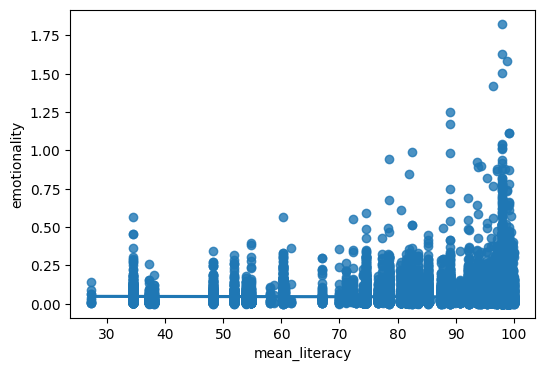

In [203]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_literacy, fit_reg=True);

In [204]:
df[["emotionality", "mean_literacy"]].corr()

emotionality  mean_literacy
emotionality           1.00          -0.01
mean_literacy         -0.01           1.00

In [205]:
results = smf.ols("emotionality ~ mean_literacy", data = df).fit()
results.pvalues, results.params

(Intercept        8.838083e-170
 mean_literacy     8.329112e-03
 dtype: float64,
 Intercept        0.049401
 mean_literacy   -0.000050
 dtype: float64)

# Discourse by mean_ARV_coverage

## Discourse as sentiment
Low negative corr, but high significance.

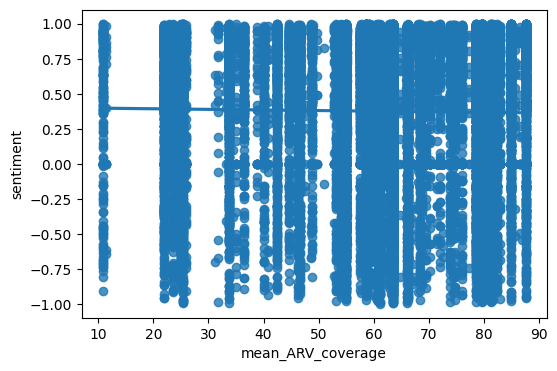

In [206]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_ARV_coverage, fit_reg=True);

In [207]:
df[["sentiment", "mean_ARV_coverage"]].corr()

sentiment  mean_ARV_coverage
sentiment           1.000000          -0.015461
mean_ARV_coverage  -0.015461           1.000000

In [208]:
results = smf.ols("sentiment ~ mean_ARV_coverage", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_ARV_coverage    0.000238
 dtype: float64,
 Intercept            0.402323
 mean_ARV_coverage   -0.000425
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

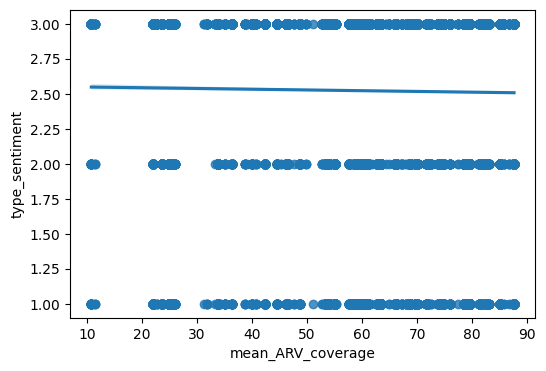

In [209]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_ARV_coverage, fit_reg=True);

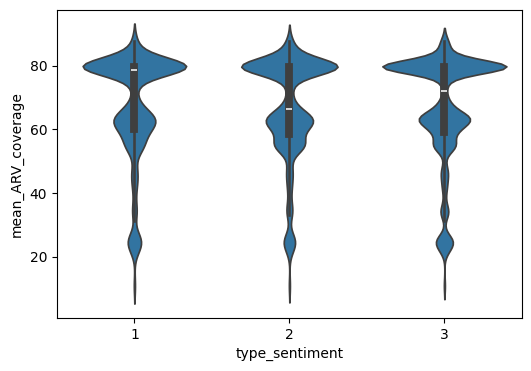

In [210]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_ARV_coverage);

In [211]:
group1 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([6.00402096]), array([0.00247038]))

In [212]:
results = smf.mnlogit("type_sentiment ~ mean_ARV_coverage", data = df[["type_sentiment", "mean_ARV_coverage"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.860404
         Iterations 5


(                              0              1
 Intercept          2.475825e-07  5.782959e-245
 mean_ARV_coverage  3.639696e-03   8.160219e-04,
                           0         1
 Intercept          0.308784  1.637578
 mean_ARV_coverage -0.002527 -0.002375)

## Discourse as emotionality
Low negative corr, but high significance.

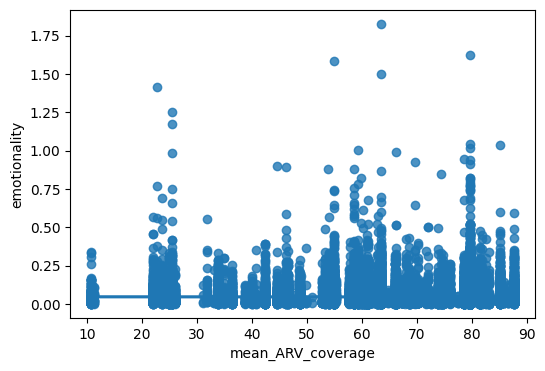

In [213]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_ARV_coverage, fit_reg=True);

In [214]:
df[["emotionality", "mean_ARV_coverage"]].corr()

emotionality  mean_ARV_coverage
emotionality           1.000000          -0.003962
mean_ARV_coverage     -0.003962           1.000000

In [215]:
results = smf.ols("emotionality ~ mean_ARV_coverage", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_ARV_coverage    0.346364
 dtype: float64,
 Intercept            0.046340
 mean_ARV_coverage   -0.000013
 dtype: float64)

# Discourse by mean_health_exp

## Discourse as sentiment
Low negative corr, but high significance.

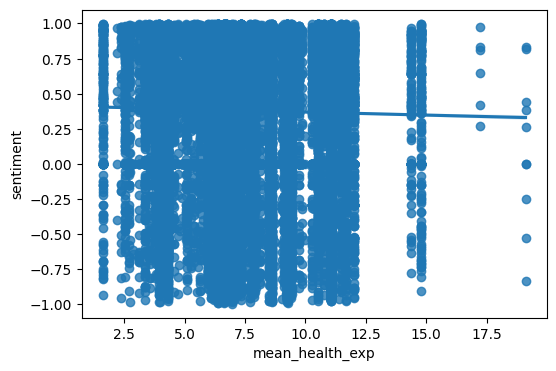

In [216]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_health_exp, fit_reg=True);

In [217]:
df[["sentiment", "mean_health_exp"]].corr()

sentiment  mean_health_exp
sentiment         1.000000        -0.021376
mean_health_exp  -0.021376         1.000000

In [218]:
results = smf.ols("sentiment ~ mean_health_exp", data = df).fit()
results.pvalues, results.params

(Intercept          0.000000e+00
 mean_health_exp    1.666008e-08
 dtype: float64,
 Intercept          0.411641
 mean_health_exp   -0.004260
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

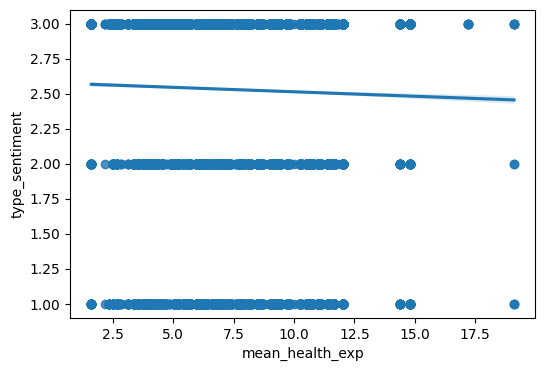

In [219]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_health_exp, fit_reg=True);

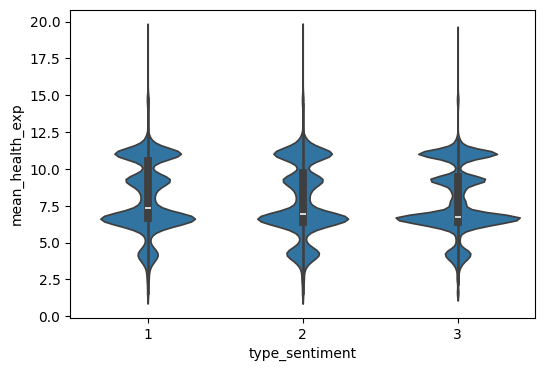

In [220]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_health_exp);

In [221]:
group1 = df[["mean_health_exp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_health_exp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_health_exp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([30.53691382]), array([5.54363698e-14]))

In [222]:
results = smf.mnlogit("type_sentiment ~ mean_health_exp", data = df[["type_sentiment", "mean_health_exp"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851249
         Iterations 5


(                            0             1
 Intercept        4.555733e-22  0.000000e+00
 mean_health_exp  2.497103e-13  6.841417e-12,
                         0         1
 Intercept        0.455731  1.750209
 mean_health_exp -0.041734 -0.031482)

## Discourse as emotionality
Low **positive** corr, but high significance.

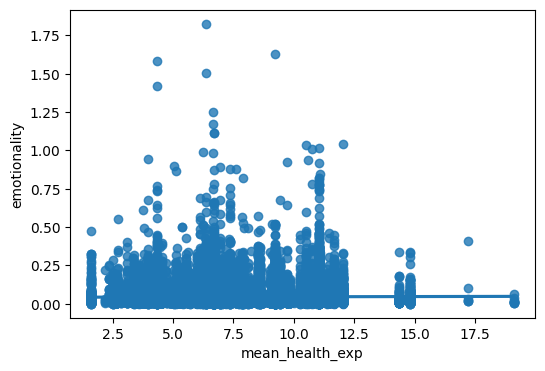

In [223]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_health_exp, fit_reg=True);

In [224]:
df[["emotionality", "mean_health_exp"]].corr()

emotionality  mean_health_exp
emotionality          1.00000          0.01226
mean_health_exp       0.01226          1.00000

In [225]:
results = smf.ols("emotionality ~ mean_health_exp", data = df).fit()
results.pvalues, results.params

(Intercept          0.00000
 mean_health_exp    0.00121
 dtype: float64,
 Intercept          0.042464
 mean_health_exp    0.000293
 dtype: float64)

# Discourse by mean_UHC_coverage

## Discourse as sentiment
Low negative corr, but high significance.

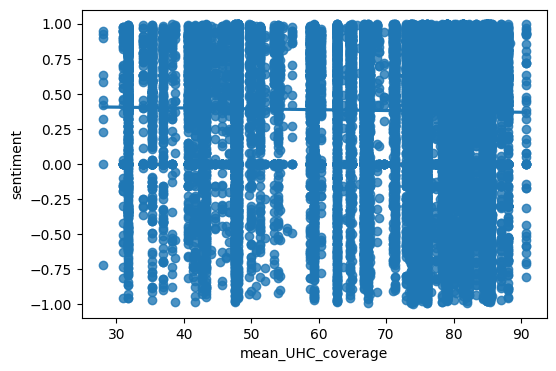

In [226]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_UHC_coverage, fit_reg=True);

In [227]:
df[["sentiment", "mean_UHC_coverage"]].corr()

sentiment  mean_UHC_coverage
sentiment           1.000000          -0.016431
mean_UHC_coverage  -0.016431           1.000000

In [228]:
results = smf.ols("sentiment ~ mean_UHC_coverage", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_UHC_coverage    0.000014
 dtype: float64,
 Intercept            0.423501
 mean_UHC_coverage   -0.000605
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

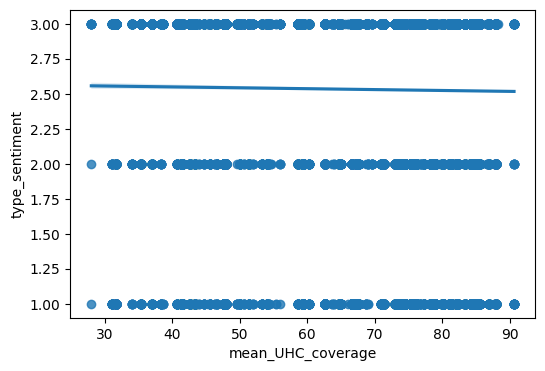

In [229]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_UHC_coverage, fit_reg=True);

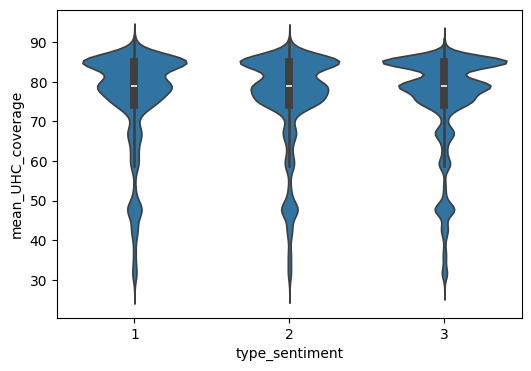

In [230]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_UHC_coverage);

In [231]:
group1 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([4.4142513]), array([0.012107]))

In [233]:
results = smf.mnlogit("type_sentiment ~ mean_UHC_coverage", data = df[["type_sentiment", "mean_UHC_coverage"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851668
         Iterations 5


(                          0              1
 Intercept          0.000972  1.492320e-144
 mean_UHC_coverage  0.072779   3.074990e-03,
                           0         1
 Intercept          0.269021  1.692208
 mean_UHC_coverage -0.001913 -0.002556)

In [234]:
results = smf.ols("type_sentiment ~ mean_UHC_coverage", data = df[["type_sentiment", "mean_UHC_coverage"]]).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_UHC_coverage    0.003977
 dtype: float64,
 Intercept            2.574242
 mean_UHC_coverage   -0.000638
 dtype: float64)

## Discourse as emotionality
Low negative corr, **NOT significant**.

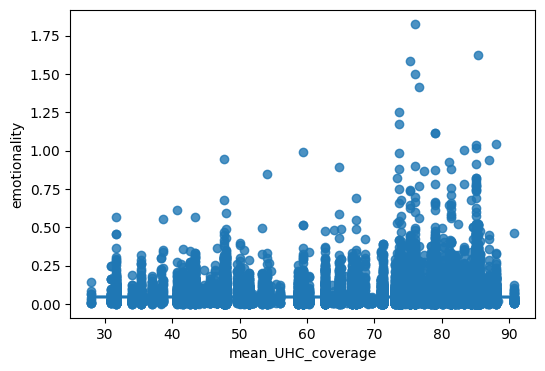

In [235]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_UHC_coverage, fit_reg=True);

In [236]:
df[["emotionality", "mean_UHC_coverage"]].corr()

emotionality  mean_UHC_coverage
emotionality           1.000000          -0.002043
mean_UHC_coverage     -0.002043           1.000000

In [237]:
results = smf.ols("emotionality ~ mean_UHC_coverage", data = df).fit()
results.pvalues, results.params

(Intercept            1.906582e-275
 mean_UHC_coverage     5.897074e-01
 dtype: float64,
 Intercept            0.045456
 mean_UHC_coverage   -0.000009
 dtype: float64)

# Discourse by mean_rights

## Discourse as sentiment
Low negative corr, but high significance.

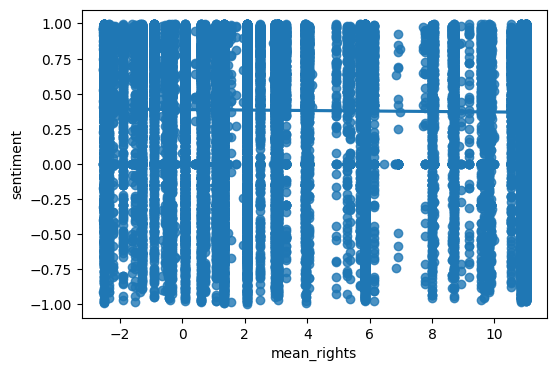

In [238]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_rights, fit_reg=True);

In [239]:
df[["sentiment", "mean_rights"]].corr()

sentiment  mean_rights
sentiment     1.000000    -0.016712
mean_rights  -0.016712     1.000000

In [240]:
results = smf.ols("sentiment ~ mean_rights", data = df).fit()
results.pvalues, results.params

(Intercept      0.00000
 mean_rights    0.00001
 dtype: float64,
 Intercept      0.387151
 mean_rights   -0.001709
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_rights, fit_reg=True);

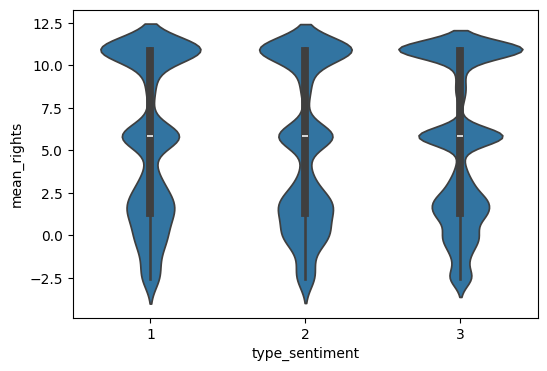

In [241]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_rights);

In [242]:
group1 = df[["mean_rights"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_rights"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_rights"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([20.21218646]), array([1.67688542e-09]))

In [243]:
results = smf.mnlogit("type_sentiment ~ mean_rights", data = df[["type_sentiment", "mean_rights"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851442
         Iterations 5


(                        0         1
 Intercept    2.341057e-27  0.000000
 mean_rights  2.602430e-10  0.000003,
                     0         1
 Intercept    0.224419  1.559677
 mean_rights -0.018504 -0.011008)

## Discourse as emotionality
Low **positive** corr, but high significance.

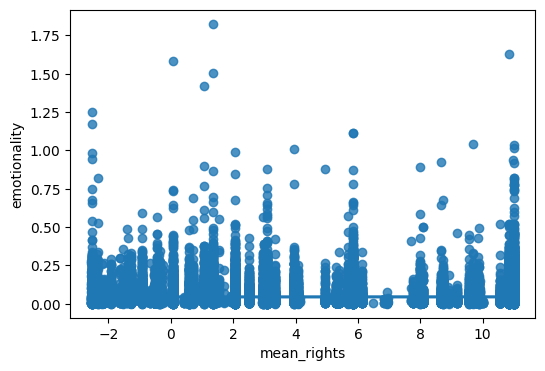

In [244]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_rights, fit_reg=True);

In [245]:
df[["emotionality", "mean_rights"]].corr()

emotionality  mean_rights
emotionality      1.000000     0.002469
mean_rights       0.002469     1.000000

In [246]:
results = smf.ols("emotionality ~ mean_rights", data = df).fit()
results.pvalues, results.params

(Intercept      0.000000
 mean_rights    0.514493
 dtype: float64,
 Intercept      0.044615
 mean_rights    0.000030
 dtype: float64)

# Discourse by mean_sex_index

## Discourse as sentiment
Low **positive** corr, but high significance.

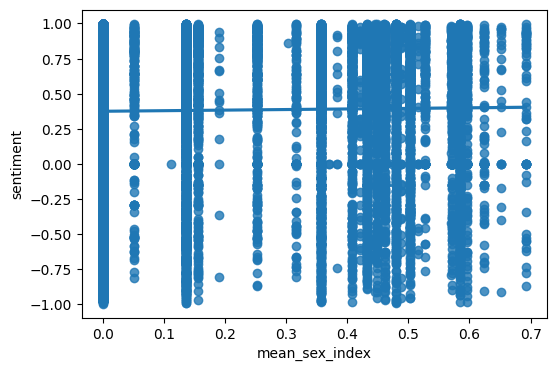

In [247]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_sex_index, fit_reg=True);

In [248]:
df[["sentiment", "mean_sex_index"]].corr()

sentiment  mean_sex_index
sentiment        1.000000        0.014222
mean_sex_index   0.014222        1.000000

In [249]:
results = smf.ols("sentiment ~ mean_sex_index", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_sex_index    0.000173
 dtype: float64,
 Intercept         0.375007
 mean_sex_index    0.040991
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

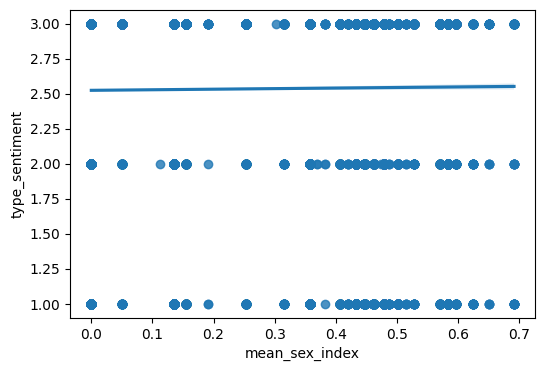

In [250]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_sex_index, fit_reg=True);

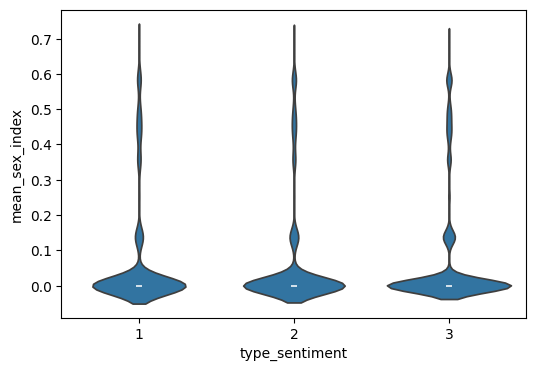

In [251]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_sex_index);

In [252]:
group1 = df[["mean_sex_index"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_sex_index"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_sex_index"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([11.96614838]), array([6.36883124e-06]))

In [253]:
results = smf.mnlogit("type_sentiment ~ mean_sex_index", data = df[["type_sentiment", "mean_sex_index"]]).fit()
results.pvalues, results.params
# Not continuous

Optimization terminated successfully.
         Current function value: 0.851557
         Iterations 5


(                           0         1
 Intercept       1.046994e-22  0.000000
 mean_sex_index  1.613986e-03  0.413207,
                        0         1
 Intercept       0.143174  1.495498
 mean_sex_index -0.265610  0.054219)

## Discourse as emotionality
Low **positive** corr, but high significance.

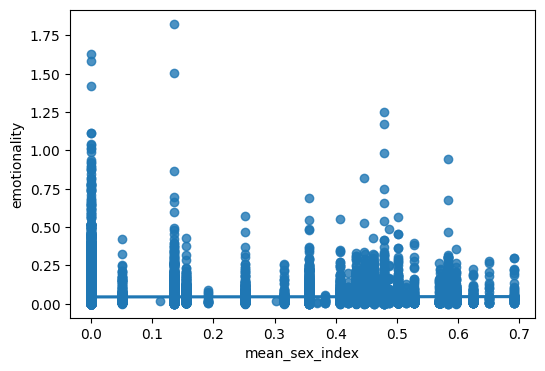

In [254]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_sex_index, fit_reg=True);

In [255]:
df[["emotionality", "mean_sex_index"]].corr()

emotionality  mean_sex_index
emotionality        1.000000        0.007946
mean_sex_index      0.007946        1.000000

In [256]:
results = smf.ols("emotionality ~ mean_sex_index", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_sex_index    0.035923
 dtype: float64,
 Intercept         0.044577
 mean_sex_index    0.002747
 dtype: float64)

# Discourse by mean_hate_protection

## Discourse as sentiment
Low negative corr, **NOT significant**

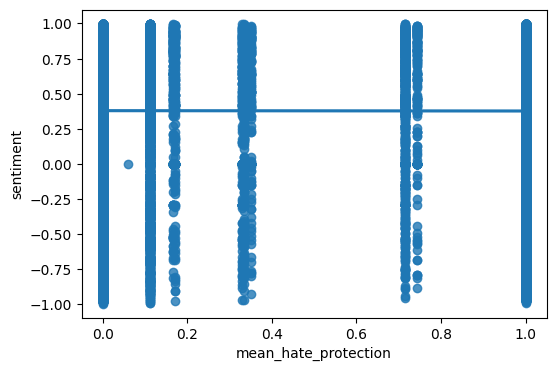

In [257]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_hate_protection, fit_reg=True);

In [258]:
df[["sentiment", "mean_hate_protection"]].corr()

sentiment  mean_hate_protection
sentiment              1.000000             -0.002466
mean_hate_protection  -0.002466              1.000000

In [259]:
results = smf.ols("sentiment ~ mean_hate_protection", data = df).fit()
results.pvalues, results.params

(Intercept               0.000000
 mean_hate_protection    0.514995
 dtype: float64,
 Intercept               0.379329
 mean_hate_protection   -0.002390
 dtype: float64)

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation, **NOT significant for positive sentiment**.

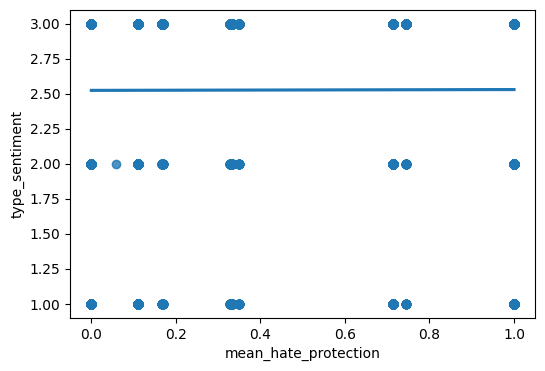

In [260]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_hate_protection, fit_reg=True);

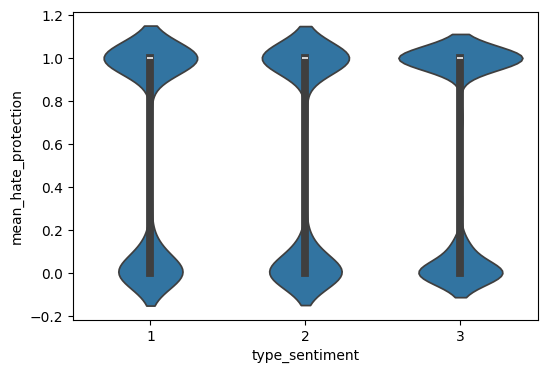

In [261]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_hate_protection);

In [262]:
group1 = df[["mean_hate_protection"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_hate_protection"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_hate_protection"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([30.96938167]), array([3.59865922e-14]))

In [268]:
results = smf.mnlogit("type_sentiment ~ mean_hate_protection", data = df[["type_sentiment", "mean_hate_protection"]]).fit()
results.pvalues, results.params
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.851290
         Iterations 5


(                                 0         1
 Intercept             2.314958e-29  0.000000
 mean_hate_protection  9.533980e-12  0.117067,
                              0         1
 Intercept             0.228715  1.519474
 mean_hate_protection -0.188742 -0.035115)

## Discourse as emotionality
Low negative corr, **NOT significant**.

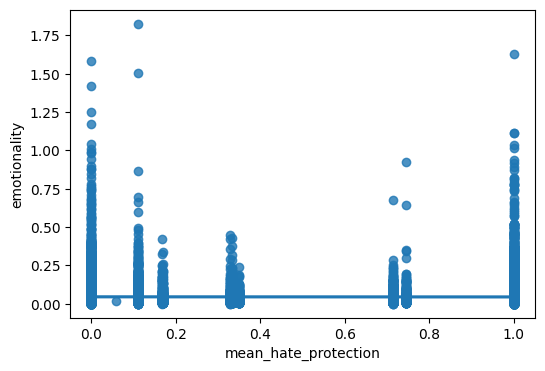

In [264]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_hate_protection, fit_reg=True);

In [265]:
df[["emotionality", "mean_hate_protection"]].corr()

emotionality  mean_hate_protection
emotionality              1.000000             -0.006405
mean_hate_protection     -0.006405              1.000000

In [266]:
results = smf.ols("emotionality ~ mean_hate_protection", data = df).fit()
results.pvalues, results.params

(Intercept               0.000000
 mean_hate_protection    0.090831
 dtype: float64,
 Intercept               0.045194
 mean_hate_protection   -0.000744
 dtype: float64)

# Discourse by region

In [271]:
df.region.value_counts()

region
North America                 82396
Europe & Central Asia         37577
East Asia & Pacific           12036
Latin America & Caribbean      3850
Middle East & North Africa     2780
South Asia                     1185
Sub-Saharan Africa              553
Name: count, dtype: int64

In [366]:
onehotencoder = preprocessing.OneHotEncoder()
regions_categ = onehotencoder.fit_transform(df[["region"]]).toarray()
encoded_df = pd.DataFrame(regions_categ, columns=onehotencoder.get_feature_names_out(["region"]))
df_regioncateg = pd.concat([df, encoded_df], axis=1)
df_regioncateg.drop("region", axis=1, inplace=True)
df_regioncateg

id_web        lat        long  \
0            1  45.524600  -73.604493   
1            2  45.514617  -73.575139   
2            3  45.525991  -73.603195   
3            4  45.525713  -73.603528   
4            5  45.460612  -73.504457   
...        ...        ...         ...   
148710  711896  39.474226   -0.371138   
148711  711897  39.214083   23.018151   
148712  713055  50.442382 -104.357472   
148713  713056  50.705800    1.580838   
148714  713876  39.019485  -94.737419   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
148710                               Nuestro primer beso.       sl     0.0000   
148711  Και αναρωτιέμαι πως θα με κοίταζες... αν ήξερε...       el     0.0000   
148712  first time i was ever called a fag. this town ...       en    -0.8779   
148713  I was lost in my feelings, i met you, and i kn...       en     0.2011   
148714                         came out as nonbinary here       en     0.0000   

        type_sentiment  characters  emotionality              country_name  \
0                    1         173      0.039564                    Canada   
1                    3         508      0.170131                    Canada   
2                    3          47      0.011789                    Canada   
3                    3         250      0.084220                    Canada   
4                    3          93      0.022338                    Canada   
...                ...         ...           ...                       ...   
148710               2          20      0.003529                     Spain   
148711               2         142      0.025057                    Greece   
148712               1          81      0.026841                    Canada   
148713               3         352      0.074605                    France   
148714               2          26      0.004588  United States of America   

        ...                       transition mean_hate_protection  \
0       ...  01. Legal, surgery not required                  1.0   
1       ...  01. Legal, surgery not required                  1.0   
2       ...  01. Legal, surgery not required                  1.0   
3       ...  01. Legal, surgery not required                  1.0   
4       ...  01. Legal, surgery not required                  1.0   
...     ...                              ...                  ...   
148710  ...  01. Legal, surgery not required                  0.0   
148711  ...  01. Legal, surgery not required                  0.0   
148712  ...  01. Legal, surgery not required                  1.0   
148713  ...  01. Legal, surgery not required                  0.0   
148714  ...             03. Varies by region                  NaN   

        region_East Asia & Pacific  region_Europe & Central Asia  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
148710                         0.0                           1.0   
148711                         0.0                           1.0   
148712                         0.0                           0.0   
148713                         0.0                           1.0   
148714                      

## Discourse as sentiment

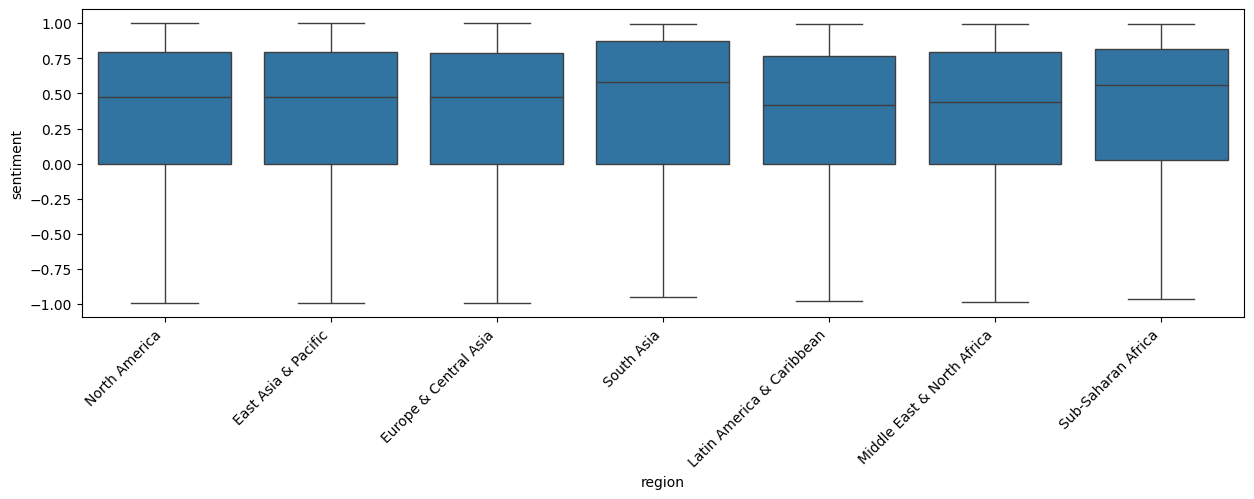

In [310]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.sentiment, x= df.region)
plt.xticks(rotation=45, ha="right");

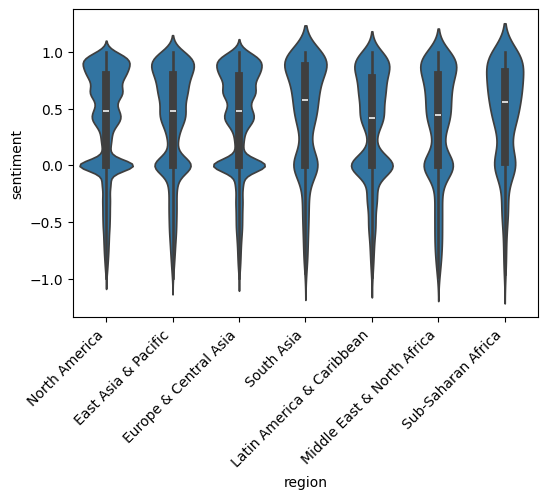

In [311]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.region)
plt.xticks(rotation=45, ha="right");

In [317]:
results = smf.ols("sentiment ~ C(region, Treatment('Latin America & Caribbean'))", data = df).fit()
results.pvalues, results.params
# Having Latin America & Caribbean as reference, all the others regions present a higher sentiment.
# Being the highest in Sub-Saharan Africa
# For all the regions the relationship between region and sentiment is significant

(Intercept                                                                          0.000000e+00
 C(region, Treatment('Latin America & Caribbean'))[T.East Asia & Pacific]           2.301297e-08
 C(region, Treatment('Latin America & Caribbean'))[T.Europe & Central Asia]         8.448800e-14
 C(region, Treatment('Latin America & Caribbean'))[T.Middle East & North Africa]    3.529047e-01
 C(region, Treatment('Latin America & Caribbean'))[T.North America]                 6.896823e-11
 C(region, Treatment('Latin America & Caribbean'))[T.South Asia]                    4.096750e-12
 C(region, Treatment('Latin America & Caribbean'))[T.Sub-Saharan Africa]            7.468765e-08
 dtype: float64,
 Intercept                                                                          0.330081
 C(region, Treatment('Latin America & Caribbean'))[T.East Asia & Pacific]           0.048415
 C(region, Treatment('Latin America & Caribbean'))[T.Europe & Central Asia]         0.059102
 C(region, Treatment('Lat

In [367]:
results = smf.ols("sentiment ~ df_regioncateg['region_East Asia & Pacific'] + df_regioncateg['region_Europe & Central Asia'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
results.pvalues, results.params
# Having Latin America & Caribbean as reference, and recategorising region as dummies, the results are very similar,
# but in this case, region_Middle East & North Africa and Latin America & Caribbean don't present a significant differnce

(Intercept                                              0.000000e+00
 df_regioncateg['region_East Asia & Pacific']           2.348676e-08
 df_regioncateg['region_Europe & Central Asia']         1.146638e-19
 df_regioncateg['region_Middle East & North Africa']    6.830157e-01
 df_regioncateg['region_North America']                 5.459611e-15
 df_regioncateg['region_South Asia']                    6.650174e-11
 df_regioncateg['region_Sub-Saharan Africa']            9.698622e-07
 dtype: float64,
 Intercept                                              0.344916
 df_regioncateg['region_East Asia & Pacific']           0.033580
 df_regioncateg['region_Europe & Central Asia']         0.044267
 df_regioncateg['region_Middle East & North Africa']   -0.004016
 df_regioncateg['region_North America']                 0.035497
 df_regioncateg['region_South Asia']                    0.092962
 df_regioncateg['region_Sub-Saharan Africa']            0.099646
 dtype: float64)

In [326]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.85
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.79e-26
Time:                        18:15:18   Log-Likelihood:                -98074.
No. Observations:              148715   AIC:                         1.962e+05
Df Residuals:                  148708   BIC:                         1.962e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.3449      0.004     81.376      0.000       0.337       0.353
df_regioncateg['region_East Asia & Pacific']            0.0336      0.006      5.584      0.000       0.022       0.045
df_regioncateg['region_Europe & Central Asia']          0.0443      0.005      9.075      0.000       0.035       0.054
df_regioncateg['region_Middle East & North Africa']    -0.0040      0.010     -0.408      0.683      -0.023       0.015
df_regioncateg['region_North America']                  0.0355      0.005      7.817      0.000       0.027       0.044
df_regioncateg['region_South Asia']                     0.0930      0.014      6.529      0.000       0.065       0.121
df_regioncateg['region_Sub-Saharan Africa']             0.0996      0.020      4.898      0.000       0.060       0.140
==============================================================================
Omnibus:                    10754.318   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11626.242
Skew:                          -0.649   Prob(JB):                         0.00
Kurtosis:                       2.564   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Discourse as type_sentiment

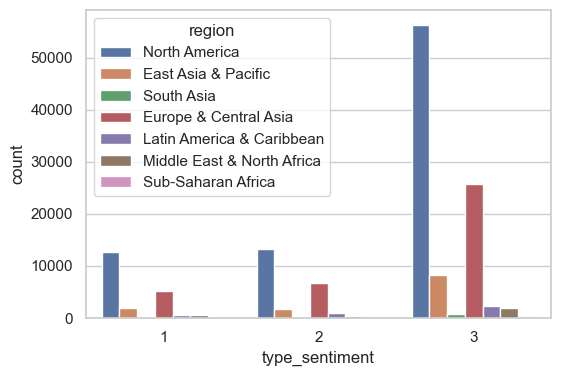

In [330]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='region', data=df);

In [333]:
results = smf.mnlogit("type_sentiment ~ region", data = df[["type_sentiment", "region"]]).fit()
results.pvalues, results.params
# results.summary()
# Considering negative type as the reference category for y, three regions are not significant for neutral sentiment, 
# but all the regions are significant for positive sentiment.
# Latin America & Caribbean and Middle East & North Africa have worst sentiment. Sub-Saharan Africa has the highest positive

Optimization terminated successfully.
         Current function value: 0.843706
         Iterations 5


(                                                 0             1
 Intercept                             2.052414e-03  0.000000e+00
 region[T.Europe & Central Asia]       8.762798e-21  1.829788e-10
 region[T.Latin America & Caribbean]   5.144123e-12  1.790982e-02
 region[T.Middle East & North Africa]  4.106277e-01  6.973137e-03
 region[T.North America]               4.861821e-05  1.175593e-02
 region[T.South Asia]                  1.946364e-01  8.809340e-03
 region[T.Sub-Saharan Africa]          2.128784e-01  1.365239e-03,
                                              0         1
 Intercept                            -0.100189  1.419359
 region[T.Europe & Central Asia]       0.349891  0.186437
 region[T.Latin America & Caribbean]   0.423341 -0.121219
 region[T.Middle East & North Africa] -0.059815 -0.150605
 region[T.North America]               0.141312  0.067570
 region[T.South Asia]                  0.148102  0.233303
 region[T.Sub-Saharan Africa]          0.216261  0.434532)

In [337]:
results = smf.mnlogit("type_sentiment ~ df_regioncateg['region_East Asia & Pacific'] + df_regioncateg['region_Europe & Central Asia'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.846944
         Iterations 5


(                                                               0             1
 Intercept                                           1.992923e-27  0.000000e+00
 df_regioncateg['region_East Asia & Pacific']        5.787192e-22  4.542455e-01
 df_regioncateg['region_Europe & Central Asia']      2.980407e-02  8.597174e-13
 df_regioncateg['region_Middle East & North Afri...  1.123236e-11  2.734047e-02
 df_regioncateg['region_North America']              1.815737e-18  5.855976e-04
 df_regioncateg['region_South Asia']                 1.412993e-02  3.570791e-03
 df_regioncateg['region_Sub-Saharan Africa']         2.243086e-01  6.835864e-04,
                                                            0         1
 Intercept                                           0.326503  1.392587
 df_regioncateg['region_East Asia & Pacific']       -0.426692  0.026772
 df_regioncateg['region_Europe & Central Asia']     -0.076801  0.213209
 df_regioncateg['region_Middle East & North Afri... -0.486507 -0.123833

## Discourse as emotionality

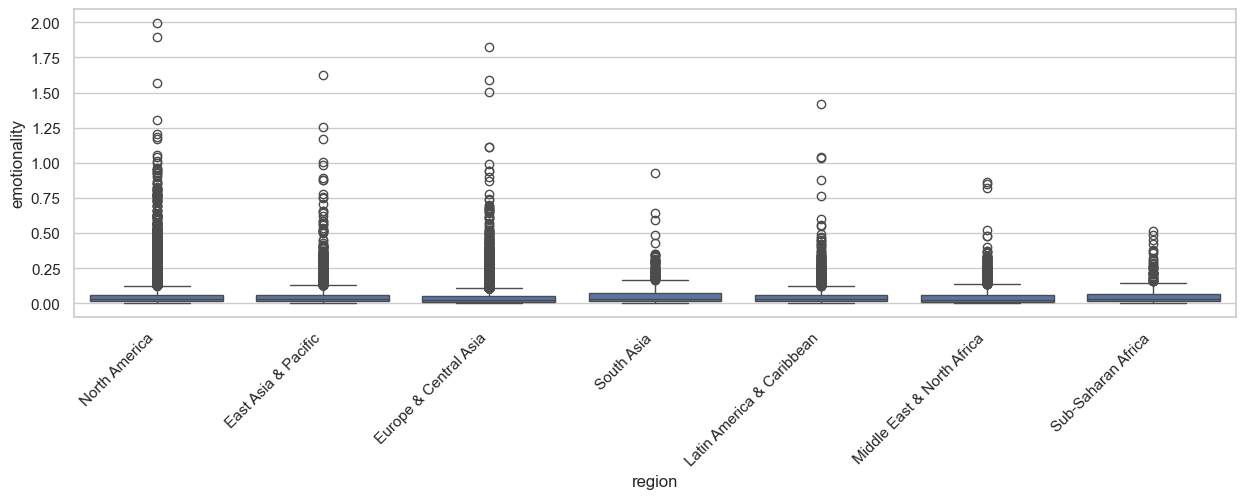

In [338]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.region)
plt.xticks(rotation=45, ha="right");

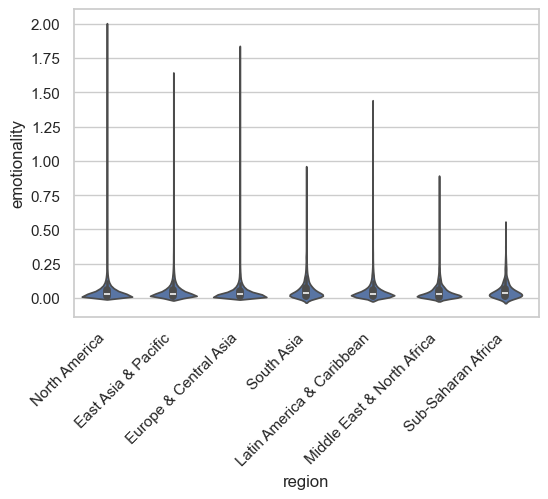

In [339]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.region)
plt.xticks(rotation=45, ha="right");

In [341]:
results = smf.ols("emotionality ~ C(region, Treatment('Europe & Central Asia'))", data = df).fit()
results.pvalues, results.params
# All have more emotionality than Europe & Central Asia, being the highest in South Asia

(Intercept                                                                      0.000000e+00
 C(region, Treatment('Europe & Central Asia'))[T.East Asia & Pacific]           5.434996e-41
 C(region, Treatment('Europe & Central Asia'))[T.Latin America & Caribbean]     1.749511e-15
 C(region, Treatment('Europe & Central Asia'))[T.Middle East & North Africa]    5.384160e-06
 C(region, Treatment('Europe & Central Asia'))[T.North America]                 2.274523e-61
 C(region, Treatment('Europe & Central Asia'))[T.South Asia]                    7.373631e-24
 C(region, Treatment('Europe & Central Asia'))[T.Sub-Saharan Africa]            5.331350e-10
 dtype: float64,
 Intercept                                                                      0.041676
 C(region, Treatment('Europe & Central Asia'))[T.East Asia & Pacific]           0.007848
 C(region, Treatment('Europe & Central Asia'))[T.Latin America & Caribbean]     0.007524
 C(region, Treatment('Europe & Central Asia'))[T.Middle East & No

In [343]:
results = smf.ols("emotionality ~ df_regioncateg['region_East Asia & Pacific'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
results.pvalues, results.params
# Same conclusions

(Intercept                                              0.000000e+00
 df_regioncateg['region_East Asia & Pacific']           4.722133e-36
 df_regioncateg['region_Middle East & North Africa']    8.563653e-05
 df_regioncateg['region_North America']                 1.444827e-56
 df_regioncateg['region_South Asia']                    5.437760e-22
 df_regioncateg['region_Sub-Saharan Africa']            3.628770e-09
 dtype: float64,
 Intercept                                              0.042374
 df_regioncateg['region_East Asia & Pacific']           0.007149
 df_regioncateg['region_Middle East & North Africa']    0.004297
 df_regioncateg['region_North America']                 0.005052
 df_regioncateg['region_South Asia']                    0.015906
 df_regioncateg['region_Sub-Saharan Africa']            0.014162
 dtype: float64)

# Discourse by income_group

## Discourse as sentiment


In [344]:
df.income_group.value_counts()

income_group
High income            127701
Upper middle income      8725
Lower middle income      3747
Low income                204
Name: count, dtype: int64

In [362]:
onehotencoder = preprocessing.OneHotEncoder()
income_categ = onehotencoder.fit_transform(df[["income_group"]]).toarray()
encoded_df = pd.DataFrame(income_categ, columns=onehotencoder.get_feature_names_out(["income_group"]))
df_incomecateg = pd.concat([df, encoded_df], axis=1)
df_incomecateg.drop("income_group", axis=1, inplace=True)
df_incomecateg

id_web        lat        long  \
0            1  45.524600  -73.604493   
1            2  45.514617  -73.575139   
2            3  45.525991  -73.603195   
3            4  45.525713  -73.603528   
4            5  45.460612  -73.504457   
...        ...        ...         ...   
148710  711896  39.474226   -0.371138   
148711  711897  39.214083   23.018151   
148712  713055  50.442382 -104.357472   
148713  713056  50.705800    1.580838   
148714  713876  39.019485  -94.737419   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
148710                               Nuestro primer beso.       sl     0.0000   
148711  Και αναρωτιέμαι πως θα με κοίταζες... αν ήξερε...       el     0.0000   
148712  first time i was ever called a fag. this town ...       en    -0.8779   
148713  I was lost in my feelings, i met you, and i kn...       en     0.2011   
148714                         came out as nonbinary here       en     0.0000   

        type_sentiment  characters  emotionality              country_name  \
0                    1         173      0.039564                    Canada   
1                    3         508      0.170131                    Canada   
2                    3          47      0.011789                    Canada   
3                    3         250      0.084220                    Canada   
4                    3          93      0.022338                    Canada   
...                ...         ...           ...                       ...   
148710               2          20      0.003529                     Spain   
148711               2         142      0.025057                    Greece   
148712               1          81      0.026841                    Canada   
148713               3         352      0.074605                    France   
148714               2          26      0.004588  United States of America   

        ... mean_rights mean_sex_index                censor  \
0       ...   11.000000         0.0000     01. No censorship   
1       ...   11.000000         0.0000     01. No censorship   
2       ...   11.000000         0.0000     01. No censorship   
3       ...   11.000000         0.0000     01. No censorship   
4       ...   11.000000         0.0000     01. No censorship   
...     ...         ...            ...                   ...   
148710  ...    1.071877         0.0000     01. No censorship   
148711  ...   -0.335523         0.4074     01. No censorship   
148712  ...   11.000000         0.0000     01. No censorship   
148713  ...    0.071877         0.0000     01. No censorship   
148714  ...         NaN            NaN  02. Varies by region   

                             transition  mean_hate_protection  \
0       01. Legal, surgery not required                   1.0   
1       01. Legal, surgery not required                   1.0   
2       01. Legal, surgery not required                   1.0   
3       01. Legal, surgery not required                   1.0   
4       01. Legal, surgery not required                   1.0   
...                                 ...                   ...   
148710  01. Legal, surgery not required                   0.0   
148711  01. Legal, surgery not required                   0.0   
148712  01. Legal, surgery not required                   1.0   
148713  01. Legal, surgery not required                   0.0   
148714             03. Varies by region                   NaN   

        income_group_High income  income_group_Low inco

## Discourse as sentiment

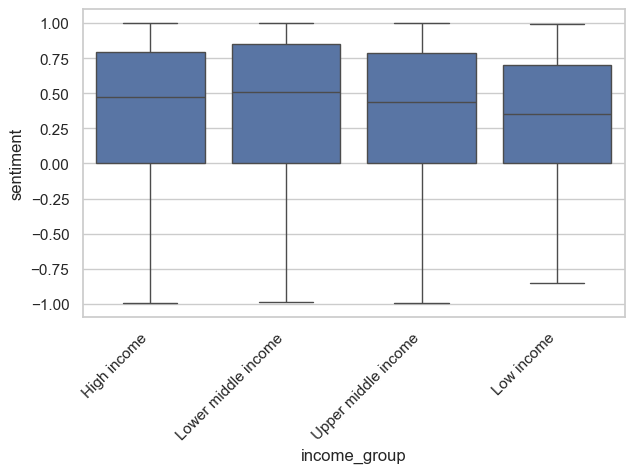

In [351]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.income_group)
plt.xticks(rotation=45, ha="right");

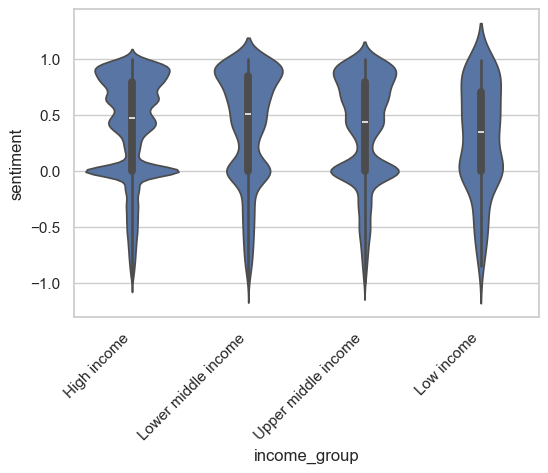

In [352]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.income_group)
plt.xticks(rotation=45, ha="right");

In [355]:
results = smf.ols("sentiment ~ C(income_group, Treatment('Low income'))", data = df).fit()
results.pvalues, results.params
# Worst sentiment in Low income group, best sentiment in Lower middle income group

(Intercept                                                          6.732525e-19
 C(income_group, Treatment('Low income'))[T.High income]            5.606499e-03
 C(income_group, Treatment('Low income'))[T.Lower middle income]    1.101091e-03
 C(income_group, Treatment('Low income'))[T.Upper middle income]    2.653721e-02
 dtype: float64,
 Intercept                                                          0.291024
 C(income_group, Treatment('Low income'))[T.High income]            0.090848
 C(income_group, Treatment('Low income'))[T.Lower middle income]    0.109818
 C(income_group, Treatment('Low income'))[T.Upper middle income]    0.073541
 dtype: float64)

In [357]:
results = smf.ols("sentiment ~ df_incomecateg['income_group_High income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Upper middle income']", data = df_incomecateg).fit()
results.pvalues, results.params
# Same conclsuions but lower improvement of sentiment in the rest groups

(Intercept                                             0.000000e+00
 df_incomecateg['income_group_High income']            1.614336e-09
 df_incomecateg['income_group_Lower middle income']    3.608880e-08
 df_incomecateg['income_group_Upper middle income']    4.548901e-02
 dtype: float64,
 Intercept                                             0.350315
 df_incomecateg['income_group_High income']            0.031557
 df_incomecateg['income_group_Lower middle income']    0.050527
 df_incomecateg['income_group_Upper middle income']    0.014249
 dtype: float64)

## Discourse as type_sentiment

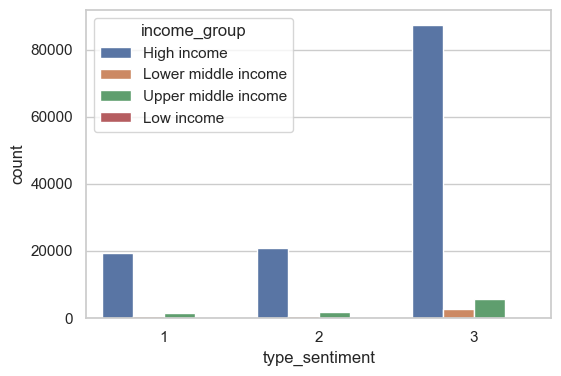

In [368]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='income_group', data=df);

In [372]:
results = smf.mnlogit("type_sentiment ~ C(income_group, Treatment('Low income'))", data = df[["type_sentiment", "income_group"]]).fit()
results.pvalues, results.params
# Income group is not significant for positive sentiment (negative sentiment as reference)
# Lower middle income has significantly less neutral sentiment than lower income

Optimization terminated successfully.
         Current function value: 0.844360
         Iterations 5


(                                                           0             1
 Intercept                                           0.060837  1.160667e-11
 C(income_group, Treatment('Low income'))[T.High...  0.132369  4.070891e-01
 C(income_group, Treatment('Low income'))[T.Lowe...  0.009156  6.846929e-01
 C(income_group, Treatment('Low income'))[T.Uppe...  0.472738  6.434400e-01,
                                                            0         1
 Intercept                                           0.426084  1.346448
 C(income_group, Treatment('Low income'))[T.High... -0.342352  0.164648
 C(income_group, Treatment('Low income'))[T.Lowe... -0.612260  0.082589
 C(income_group, Treatment('Low income'))[T.Uppe... -0.165272  0.092930)

In [375]:
results = smf.mnlogit("type_sentiment ~ df_incomecateg['income_group_High income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Upper middle income']", data = df_incomecateg).fit()
results.pvalues, results.params
# High income and Lower middle income have significantly less neutral sentiment than lower income
# High income has significanly more positive sentiment than lower income

Optimization terminated successfully.
         Current function value: 0.847527
         Iterations 5


(                                                               0         1
 Intercept                                           1.061092e-19  0.000000
 df_incomecateg['income_group_High income']          6.070628e-11  0.016916
 df_incomecateg['income_group_Lower middle income']  1.212918e-13  0.914453
 df_incomecateg['income_group_Upper middle income']  1.742836e-01  0.917060,
                                                            0         1
 Intercept                                           0.330724  1.434864
 df_incomecateg['income_group_High income']         -0.246992  0.076232
 df_incomecateg['income_group_Lower middle income'] -0.516899 -0.005826
 df_incomecateg['income_group_Upper middle income'] -0.069912  0.004514)

## Discourse as emotionality

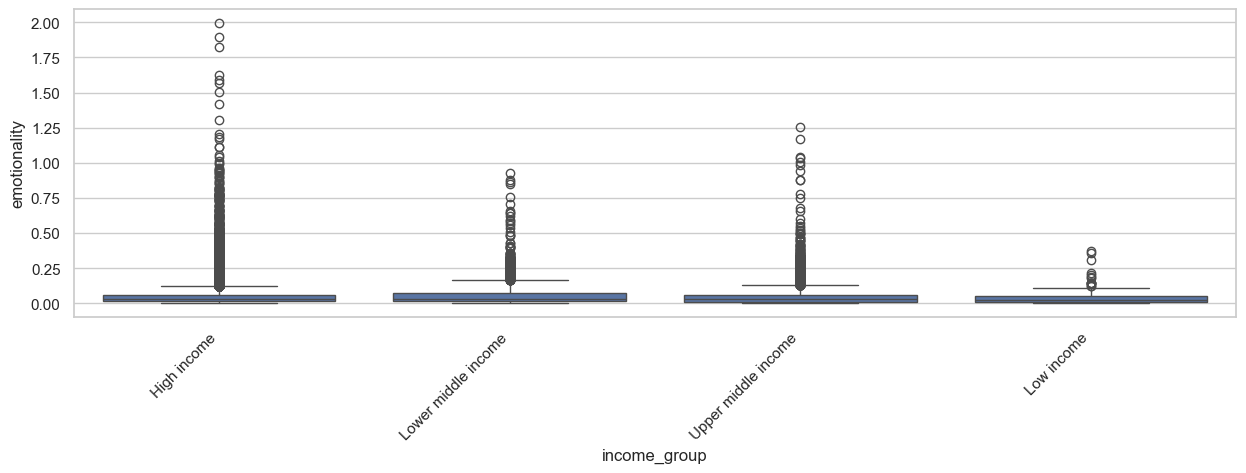

In [376]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.income_group)
plt.xticks(rotation=45, ha="right");

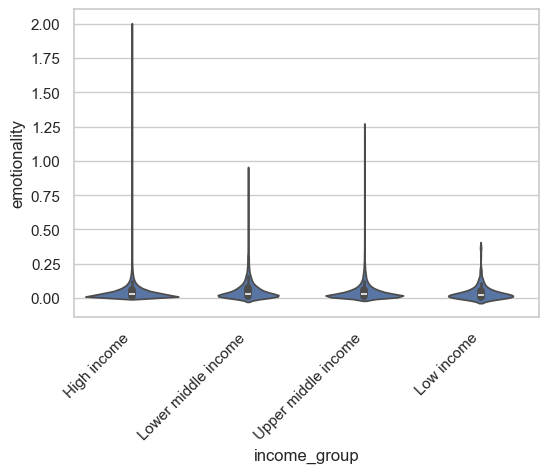

In [383]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.income_group)
plt.xticks(rotation=45, ha="right");

In [380]:
results = smf.ols("emotionality ~ C(income_group, Treatment('Low income'))", data = df).fit()
results.pvalues, results.params
# Lower middle incomeand Upper middle income have significantly more emotionality than Low income

(Intercept                                                          8.682881e-25
 C(income_group, Treatment('Low income'))[T.High income]            1.576523e-01
 C(income_group, Treatment('Low income'))[T.Lower middle income]    6.244035e-06
 C(income_group, Treatment('Low income'))[T.Upper middle income]    6.311610e-02
 dtype: float64,
 Intercept                                                          0.040250
 C(income_group, Treatment('Low income'))[T.High income]            0.005536
 C(income_group, Treatment('Low income'))[T.Lower middle income]    0.018162
 C(income_group, Treatment('Low income'))[T.Upper middle income]    0.007360
 dtype: float64)

In [382]:
results = smf.ols("emotionality ~ df_incomecateg['income_group_High income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Upper middle income']", data = df_incomecateg).fit()
results.pvalues, results.params
# All the other income groups have significantly more emotionality than Low income
# Lower middle income has the most emotionality

(Intercept                                             0.000000e+00
 df_incomecateg['income_group_High income']            3.416222e-08
 df_incomecateg['income_group_Lower middle income']    2.192795e-48
 df_incomecateg['income_group_Upper middle income']    6.201239e-10
 dtype: float64,
 Intercept                                             0.042322
 df_incomecateg['income_group_High income']            0.003464
 df_incomecateg['income_group_Lower middle income']    0.016090
 df_incomecateg['income_group_Upper middle income']    0.005287
 dtype: float64)

# Discourse by mean_law

In [384]:
df.censor.value_counts()

censor
02. Varies by region              69945
01. No censorship                 62028
06. State-enforced                 4747
05. Fine as punishment             1729
07. Imprisonment as punishment     1362
03. Ambiguous                       240
04. Other punishment                153
Name: count, dtype: int64

In [385]:
onehotencoder = preprocessing.OneHotEncoder()
censor_categ = onehotencoder.fit_transform(df[["censor"]]).toarray()
encoded_df = pd.DataFrame(censor_categ, columns=onehotencoder.get_feature_names_out(["censor"]))
df_censorecateg = pd.concat([df, encoded_df], axis=1)
df_censorecateg.drop("censor", axis=1, inplace=True)
df_censorecateg

id_web        lat        long  \
0            1  45.524600  -73.604493   
1            2  45.514617  -73.575139   
2            3  45.525991  -73.603195   
3            4  45.525713  -73.603528   
4            5  45.460612  -73.504457   
...        ...        ...         ...   
148710  711896  39.474226   -0.371138   
148711  711897  39.214083   23.018151   
148712  713055  50.442382 -104.357472   
148713  713056  50.705800    1.580838   
148714  713876  39.019485  -94.737419   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
148710                               Nuestro primer beso.       sl     0.0000   
148711  Και αναρωτιέμαι πως θα με κοίταζες... αν ήξερε...       el     0.0000   
148712  first time i was ever called a fag. this town ...       en    -0.8779   
148713  I was lost in my feelings, i met you, and i kn...       en     0.2011   
148714                         came out as nonbinary here       en     0.0000   

        type_sentiment  characters  emotionality              country_name  \
0                    1         173      0.039564                    Canada   
1                    3         508      0.170131                    Canada   
2                    3          47      0.011789                    Canada   
3                    3         250      0.084220                    Canada   
4                    3          93      0.022338                    Canada   
...                ...         ...           ...                       ...   
148710               2          20      0.003529                     Spain   
148711               2         142      0.025057                    Greece   
148712               1          81      0.026841                    Canada   
148713               3         352      0.074605                    France   
148714               2          26      0.004588  United States of America   

        ...                       transition mean_hate_protection  \
0       ...  01. Legal, surgery not required                  1.0   
1       ...  01. Legal, surgery not required                  1.0   
2       ...  01. Legal, surgery not required                  1.0   
3       ...  01. Legal, surgery not required                  1.0   
4       ...  01. Legal, surgery not required                  1.0   
...     ...                              ...                  ...   
148710  ...  01. Legal, surgery not required                  0.0   
148711  ...  01. Legal, surgery not required                  0.0   
148712  ...  01. Legal, surgery not required                  1.0   
148713  ...  01. Legal, surgery not required                  0.0   
148714  ...             03. Varies by region                  NaN   

       censor_01. No censorship  censor_02. Varies by region  \
0                           1.0                          0.0   
1                           1.0                          0.0   
2                           1.0                          0.0   
3                           1.0                          0.0   
4                           1.0                          0.0   
...                         ...                          ...   
148710                      1.0                          0.0   
148711                      1.0                          0.0   
148712                      1.0                          0.0   
148713                      1.0                          0.0   
148714                      0.0                          1.0   

       

## Discourse as sentiment

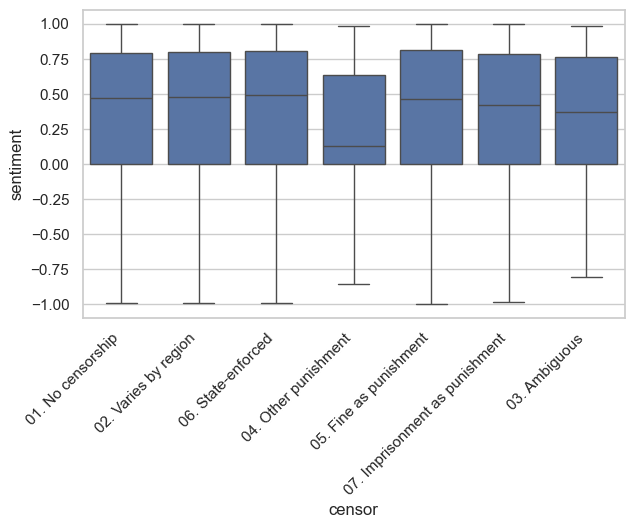

In [386]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.censor)
plt.xticks(rotation=45, ha="right");

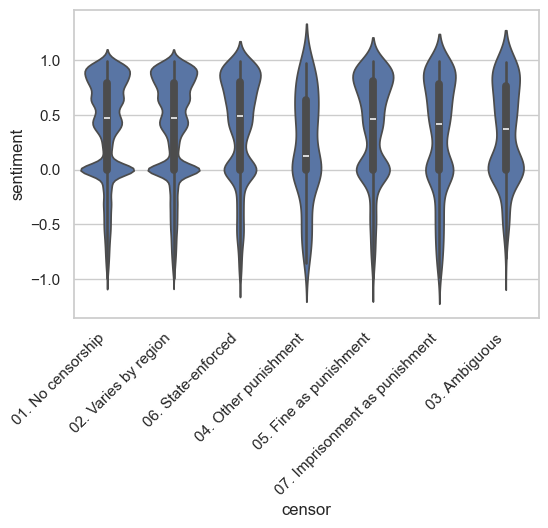

In [387]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.censor)
plt.xticks(rotation=45, ha="right");

In [391]:
results = smf.ols("sentiment ~ C(censor, Treatment('04. Other punishment'))", data = df).fit()
results.pvalues, results.params
# All have higher sentiment than those countries with Other punishment as censorship
# Highest sentiment if censorship State-enforced O.o

(Intercept                                                                         2.699280e-08
 C(censor, Treatment('04. Other punishment'))[T.01. No censorship]                 7.973394e-06
 C(censor, Treatment('04. Other punishment'))[T.02. Varies by region]              4.715287e-06
 C(censor, Treatment('04. Other punishment'))[T.03. Ambiguous]                     6.459318e-03
 C(censor, Treatment('04. Other punishment'))[T.05. Fine as punishment]            8.929687e-06
 C(censor, Treatment('04. Other punishment'))[T.06. State-enforced]                2.984720e-06
 C(censor, Treatment('04. Other punishment'))[T.07. Imprisonment as punishment]    8.503544e-03
 dtype: float64,
 Intercept                                                                         0.210358
 C(censor, Treatment('04. Other punishment'))[T.01. No censorship]                 0.169172
 C(censor, Treatment('04. Other punishment'))[T.02. Varies by region]              0.173359
 C(censor, Treatment('04. Other pun

In [396]:
results = smf.ols("sentiment ~ df_censorecateg['censor_01. No censorship'] + df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced'] + df_censorecateg['censor_07. Imprisonment as punishment']", data = df_censorecateg).fit()
results.pvalues, results.params
results.summary()
# Imprisonment and Other punishment have similar worst sentiment. 
# Highest sentiment if censorship State-enforced O.o

# censor_01. No censorship	censor_02. Varies by region	censor_03. Ambiguous	censor_04. Other punishment	censor_05. Fine as punishment	censor_06. State-enforced	censor_07. Imprisonment as punishment

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.73
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.45e-13
Time:                        19:12:54   Log-Likelihood:                -98105.
No. Observations:              148715   AIC:                         1.962e+05
Df Residuals:                  148708   BIC:                         1.963e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    0.3498      0.005     69.565      0.000       0.340       0.360
df_censorecateg['censor_01. No censorship']                  0.0297      0.005      5.541      0.000       0.019       0.040
df_censorecateg['censor_02. Varies by region']               0.0339      0.005      6.366      0.000       0.023       0.044
df_censorecateg['censor_03. Ambiguous']                     -0.0076      0.031     -0.247      0.805      -0.068       0.052
df_censorecateg['censor_05. Fine as punishment']             0.0359      0.012      2.912      0.004       0.012       0.060
df_censorecateg['censor_06. State-enforced']                 0.0402      0.008      4.751      0.000       0.024       0.057
df_censorecateg['censor_07. Imprisonment as punishment']    -0.0344      0.014     -2.524      0.012      -0.061      -0.008
==============================================================================
Omnibus:                    10767.921   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11644.503
Skew:                          -0.650   Prob(JB):                         0.00
Kurtosis:                       2.564   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Discourse as type_sentiment

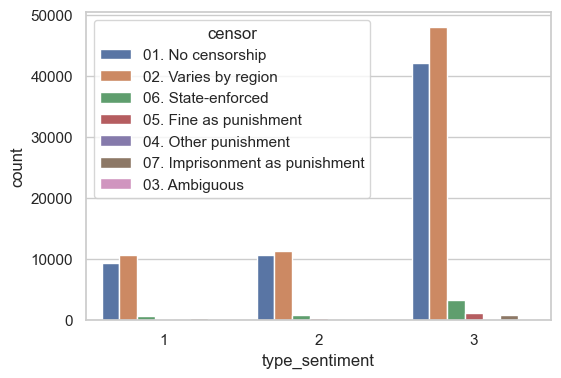

In [397]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='censor', data=df);

In [401]:
results = smf.mnlogit("type_sentiment ~ C(censor, Treatment('07. Imprisonment as punishment'))", data = df[["type_sentiment", "censor"]]).fit()
results.summary()

# All better sentiment than imprisonment
# Best sentiment for ambiguous censorship

Optimization terminated successfully.
         Current function value: 0.844335
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         type_sentiment   No. Observations:               140204
Model:                        MNLogit   Df Residuals:                   140190
Method:                           MLE   Df Model:                           12
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:               0.0005113
Time:                        19:16:12   Log-Likelihood:            -1.1838e+05
converged:                       True   LL-Null:                   -1.1844e+05
Covariance Type:            nonrobust   LLR p-value:                 3.713e-20
====================================================================================================================================================
                                                                type_sentiment=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           -0.2126      0.089     -2.387      0.017      -0.387      -0.038
C(censor, Treatment('07. Imprisonment as punishment'))[T.01. No censorship]          0.3413      0.090      3.784      0.000       0.165       0.518
C(censor, Treatment('07. Imprisonment as punishment'))[T.02. Varies by region]       0.2656      0.090      2.949      0.003       0.089       0.442
C(censor, Treatment('07. Imprisonment as punishment'))[T.03. Ambiguous]              1.2030      0.246      4.883      0.000       0.720       1.686
C(censor, Treatment('07. Imprisonment as punishment'))[T.04. Other punishment]       0.5398      0.252      2.143      0.032       0.046       1.033
C(censor, Treatment('07. Imprisonment as punishment'))[T.05. Fine as punishment]     0.6350      0.123      5.183      0.000       0.395       0.875
C(censor, Treatment('07. Imprisonment as punishment'))[T.06. State-enforced]         0.2424      0.103      2.349      0.019       0.040       0.445
----------------------------------------------------------------------------------------------------------------------------------------------------
                                                                type_sentiment=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            1.1057      0.069     16.094      0.000       0.971       1.240
C(censor, Treatment('07. Imprisonment as punishment'))[T.01. No censorship]          0.4063      0.070      5.834      0.000       0.270       0.543
C(censor, Treatment('07. Imprisonment as punishment'))[T.02. Varies by region]       0.3997      0.070      5.748      0.000       0.263       0.536
C(censor, Treatment('07. Imprisonment as punishment'))[T.03. Ambiguous]              0.6060      0.224      2.707      0.007       0.167       1.045
C(censor, Treatment('07. Imprisonment as punishment'))[T.04. Other punishment]      -0.1702      0.223     -0.764      0.445      -0.607       0.266
C(censor, Treatment('07. Imprisonment as punishment'))[T.05. Fine as punishment]     0.4760      0.099      4.791      0.000       0.281       0.671
C(censor, Treatment('07. Imprisonment as punishment'))[T.06. State-enforced]         0.3982      0.080      4.978      0.000       0.241       0.555
====================================================================================================================================================
"""

In [404]:
results = smf.mnlogit("type_sentiment ~ df_censorecateg['censor_01. No censorship'] + df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_04. Other punishment'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced']", data = df_censorecateg).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.847600
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         type_sentiment   No. Observations:               148715
Model:                        MNLogit   Df Residuals:                   148701
Method:                           MLE   Df Model:                           12
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:               0.0007677
Time:                        19:21:12   Log-Likelihood:            -1.2605e+05
converged:                       True   LL-Null:                   -1.2615e+05
Covariance Type:            nonrobust   LLR p-value:                 6.575e-35
====================================================================================================================
                                type_sentiment=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.2396      0.034      7.118      0.000       0.174       0.306
df_censorecateg['censor_01. No censorship']         -0.1109      0.037     -3.035      0.002      -0.183      -0.039
df_censorecateg['censor_02. Varies by region']      -0.1866      0.036     -5.143      0.000      -0.258      -0.115
df_censorecateg['censor_03. Ambiguous']              0.7508      0.232      3.234      0.001       0.296       1.206
df_censorecateg['censor_04. Other punishment']       0.0876      0.238      0.368      0.713      -0.379       0.554
df_censorecateg['censor_05. Fine as punishment']     0.1828      0.091      2.018      0.044       0.005       0.360
df_censorecateg['censor_06. State-enforced']        -0.2098      0.062     -3.384      0.001      -0.331      -0.088
--------------------------------------------------------------------------------------------------------------------
                                type_sentiment=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.3838      0.028     49.137      0.000       1.329       1.439
df_censorecateg['censor_01. No censorship']          0.1283      0.030      4.219      0.000       0.069       0.188
df_censorecateg['censor_02. Varies by region']       0.1216      0.030      4.036      0.000       0.063       0.181
df_censorecateg['censor_03. Ambiguous']              0.3280      0.215      1.526      0.127      -0.093       0.749
df_censorecateg['censor_04. Other punishment']      -0.4483      0.214     -2.097      0.036      -0.867      -0.029
df_censorecateg['censor_05. Fine as punishment']     0.1980      0.077      2.567      0.010       0.047       0.349
df_censorecateg['censor_06. State-enforced']         0.1202      0.050      2.416      0.016       0.023       0.218
====================================================================================================================
"""

## Discourse as emotionality

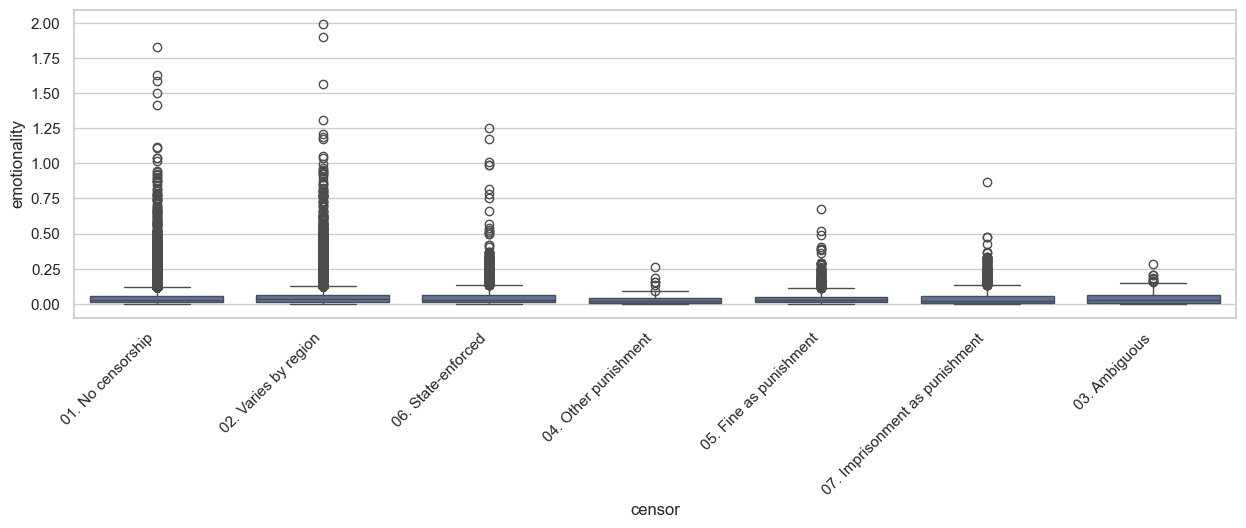

In [405]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.censor)
plt.xticks(rotation=45, ha="right");

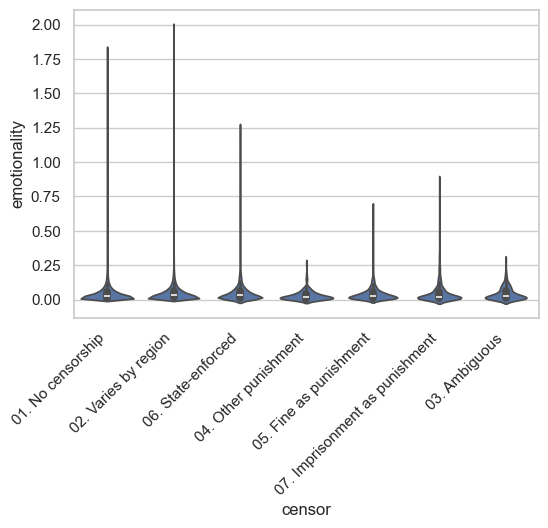

In [406]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.censor)
plt.xticks(rotation=45, ha="right");

In [412]:
results = smf.ols("emotionality ~ C(censor, Treatment('04. Other punishment'))", data = df).fit()
results.summary()
## All have a higher emotionality than if other punishment as censorship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           emotionality   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.36
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.27e-25
Time:                        19:24:10   Log-Likelihood:             2.0537e+05
No. Observations:              140204   AIC:                        -4.107e+05
Df Residuals:                  140197   BIC:                        -4.107e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          0.0305      0.005      6.746      0.000       0.022       0.039
C(censor, Treatment('04. Other punishment'))[T.01. No censorship]                  0.0141      0.005      3.118      0.002       0.005       0.023
C(censor, Treatment('04. Other punishment'))[T.02. Varies by region]               0.0171      0.005      3.773      0.000       0.008       0.026
C(censor, Treatment('04. Other punishment'))[T.03. Ambiguous]                      0.0123      0.006      2.133      0.033       0.001       0.024
C(censor, Treatment('04. Other punishment'))[T.05. Fine as punishment]             0.0117      0.005      2.483      0.013       0.002       0.021
C(censor, Treatment('04. Other punishment'))[T.06. State-enforced]                 0.0187      0.005      4.080      0.000       0.010       0.028
C(censor, Treatment('04. Other punishment'))[T.07. Imprisonment as punishment]     0.0158      0.005      3.314      0.001       0.006       0.025
==============================================================================
Omnibus:                   167167.131   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48776638.443
Skew:                           6.055   Prob(JB):                         0.00
Kurtosis:                      93.570   Cond. No.                         97.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
results = smf.ols("emotionality ~df_censorecateg['censor_01. No censorship'] + df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced'] + df_censorecateg['censor_07. Imprisonment as punishment']", data = df_censorecateg).fit()
results.summary()
# No difference with ambiguous or fine as punishment

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           emotionality   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     25.64
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.24e-30
Time:                        19:26:13   Log-Likelihood:             2.1719e+05
No. Observations:              148715   AIC:                        -4.344e+05
Df Residuals:                  148708   BIC:                        -4.343e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    0.0424      0.001     70.200      0.000       0.041       0.044
df_censorecateg['censor_01. No censorship']                  0.0023      0.001      3.496      0.000       0.001       0.004
df_censorecateg['censor_02. Varies by region']               0.0052      0.001      8.155      0.000       0.004       0.006
df_censorecateg['censor_03. Ambiguous']                      0.0005      0.004      0.130      0.896      -0.007       0.008
df_censorecateg['censor_05. Fine as punishment']            -0.0001      0.001     -0.098      0.922      -0.003       0.003
df_censorecateg['censor_06. State-enforced']                 0.0069      0.001      6.783      0.000       0.005       0.009
df_censorecateg['censor_07. Imprisonment as punishment']     0.0039      0.002      2.408      0.016       0.001       0.007
==============================================================================
Omnibus:                   180257.918   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58143284.332
Skew:                           6.210   Prob(JB):                         0.00
Kurtosis:                      99.068   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Discourse by transition

In [416]:
df.transition.value_counts()

transition
03. Varies by region               76936
01. Legal, surgery not required    49754
02. Legal, but requires surgery     6833
05. Illegal                         3228
04. Ambiguous                       3087
Name: count, dtype: int64

In [417]:
onehotencoder = preprocessing.OneHotEncoder()
transition_categ = onehotencoder.fit_transform(df[["transition"]]).toarray()
encoded_df = pd.DataFrame(transition_categ, columns=onehotencoder.get_feature_names_out(["transition"]))
df_transcateg = pd.concat([df, encoded_df], axis=1)
df_transcateg.drop("transition", axis=1, inplace=True)
df_transcateg
# transition_01. Legal, surgery not required	transition_02. Legal, but requires surgery	transition_03. Varies by region	transition_04. Ambiguous	transition_05. Illegal

id_web        lat        long  \
0            1  45.524600  -73.604493   
1            2  45.514617  -73.575139   
2            3  45.525991  -73.603195   
3            4  45.525713  -73.603528   
4            5  45.460612  -73.504457   
...        ...        ...         ...   
148710  711896  39.474226   -0.371138   
148711  711897  39.214083   23.018151   
148712  713055  50.442382 -104.357472   
148713  713056  50.705800    1.580838   
148714  713876  39.019485  -94.737419   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
148710                               Nuestro primer beso.       sl     0.0000   
148711  Και αναρωτιέμαι πως θα με κοίταζες... αν ήξερε...       el     0.0000   
148712  first time i was ever called a fag. this town ...       en    -0.8779   
148713  I was lost in my feelings, i met you, and i kn...       en     0.2011   
148714                         came out as nonbinary here       en     0.0000   

        type_sentiment  characters  emotionality              country_name  \
0                    1         173      0.039564                    Canada   
1                    3         508      0.170131                    Canada   
2                    3          47      0.011789                    Canada   
3                    3         250      0.084220                    Canada   
4                    3          93      0.022338                    Canada   
...                ...         ...           ...                       ...   
148710               2          20      0.003529                     Spain   
148711               2         142      0.025057                    Greece   
148712               1          81      0.026841                    Canada   
148713               3         352      0.074605                    France   
148714               2          26      0.004588  United States of America   

        ... mean_rights mean_sex_index                censor  \
0       ...   11.000000         0.0000     01. No censorship   
1       ...   11.000000         0.0000     01. No censorship   
2       ...   11.000000         0.0000     01. No censorship   
3       ...   11.000000         0.0000     01. No censorship   
4       ...   11.000000         0.0000     01. No censorship   
...     ...         ...            ...                   ...   
148710  ...    1.071877         0.0000     01. No censorship   
148711  ...   -0.335523         0.4074     01. No censorship   
148712  ...   11.000000         0.0000     01. No censorship   
148713  ...    0.071877         0.0000     01. No censorship   
148714  ...         NaN            NaN  02. Varies by region   

        mean_hate_protection  transition_01. Legal, surgery not required  \
0                        1.0                                         1.0   
1                        1.0                                         1.0   
2                        1.0                                         1.0   
3                        1.0                                         1.0   
4                        1.0                                         1.0   
...                      ...                                         ...   
148710                   0.0                                         1.0   
148711                   0.0                                         1.0   
148712                   1.0                                         1.0   
148713                   0.0                                         1.0   


## Discourse as sentiment

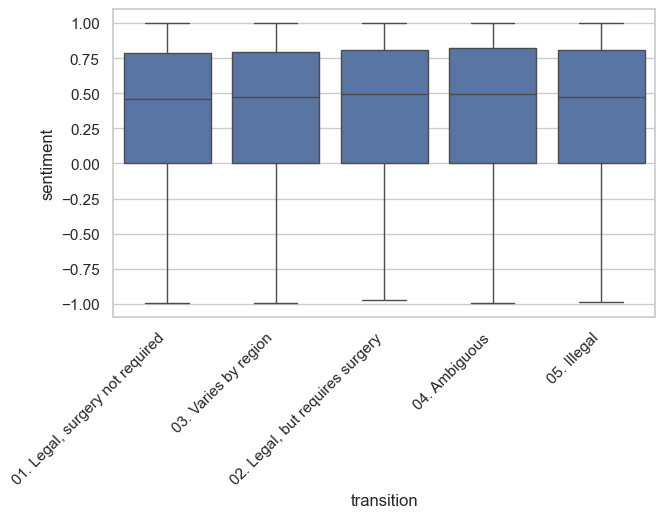

In [418]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.transition)
plt.xticks(rotation=45, ha="right");

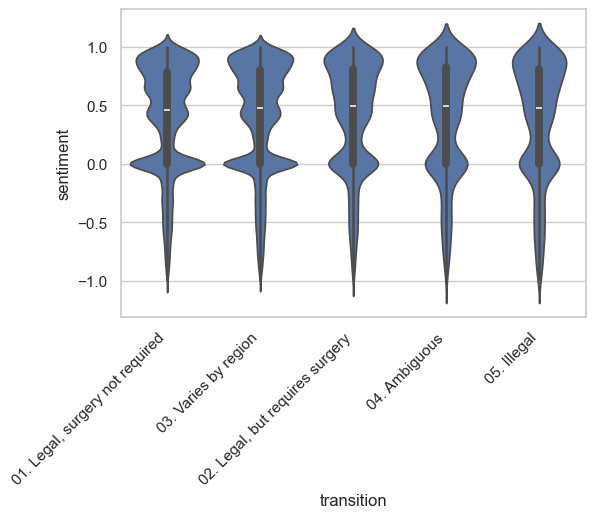

In [419]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.transition)
plt.xticks(rotation=45, ha="right");

In [422]:
results = smf.ols("sentiment ~ C(transition, Treatment('05. Illegal'))", data = df).fit()
results.pvalues, results.params
# All better sentiment than transition illegal (Legal, surgery not required: not significant)
# Best if Legal, but requires surgery

(Intercept                                                                     0.000000
 C(transition, Treatment('05. Illegal'))[T.01. Legal, surgery not required]    0.069060
 C(transition, Treatment('05. Illegal'))[T.02. Legal, but requires surgery]    0.000433
 C(transition, Treatment('05. Illegal'))[T.03. Varies by region]               0.017248
 C(transition, Treatment('05. Illegal'))[T.04. Ambiguous]                      0.046702
 dtype: float64,
 Intercept                                                                     0.362407
 C(transition, Treatment('05. Illegal'))[T.01. Legal, surgery not required]    0.015453
 C(transition, Treatment('05. Illegal'))[T.02. Legal, but requires surgery]    0.035172
 C(transition, Treatment('05. Illegal'))[T.03. Varies by region]               0.020022
 C(transition, Treatment('05. Illegal'))[T.04. Ambiguous]                      0.023432
 dtype: float64)

In [423]:
results = smf.ols("sentiment ~ df_transcateg['transition_01. Legal, surgery not required'] + df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous']", data = df_transcateg).fit()
results.pvalues, results.params
# all significantly better than transition illegal.
# best if legal, but requires surgery

(Intercept                                                      0.000000e+00
 df_transcateg['transition_01. Legal, surgery not required']    4.393510e-06
 df_transcateg['transition_02. Legal, but requires surgery']    4.644152e-09
 df_transcateg['transition_03. Varies by region']               8.534092e-09
 df_transcateg['transition_04. Ambiguous']                      1.613346e-03
 dtype: float64,
 Intercept                                                      0.356077
 df_transcateg['transition_01. Legal, surgery not required']    0.021783
 df_transcateg['transition_02. Legal, but requires surgery']    0.041502
 df_transcateg['transition_03. Varies by region']               0.026352
 df_transcateg['transition_04. Ambiguous']                      0.029762
 dtype: float64)

## Discourse as type_sentiment

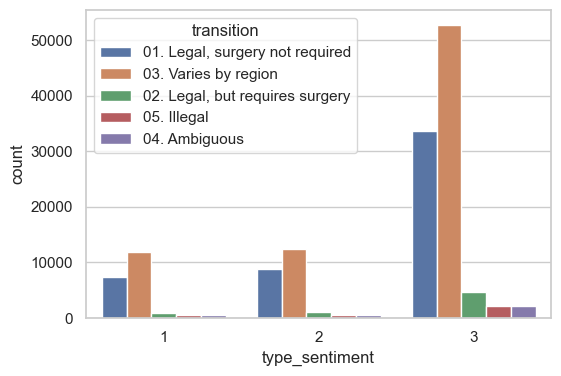

In [424]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='transition', data=df);

In [428]:
results = smf.mnlogit("type_sentiment ~ C(transition, Treatment('05. Illegal'))", data = df[["type_sentiment", "transition"]]).fit()
results.pvalues, results.params
# More positive or neutral sentiment if legal (requiring and not requiring surgery)
# Ambiguous not significant

Optimization terminated successfully.
         Current function value: 0.844512
         Iterations 5


(                                                               0  \
 Intercept                                           1.568013e-02   
 C(transition, Treatment('05. Illegal'))[T.01. L...  2.858702e-07   
 C(transition, Treatment('05. Illegal'))[T.02. L...  3.949600e-04   
 C(transition, Treatment('05. Illegal'))[T.03. V...  2.001591e-03   
 C(transition, Treatment('05. Illegal'))[T.04. A...  1.633719e-01   
 
                                                                 1  
 Intercept                                           1.417861e-175  
 C(transition, Treatment('05. Illegal'))[T.01. L...   6.221448e-05  
 C(transition, Treatment('05. Illegal'))[T.02. L...   2.128057e-05  
 C(transition, Treatment('05. Illegal'))[T.03. V...   3.693495e-04  
 C(transition, Treatment('05. Illegal'))[T.04. A...   2.689603e-01  ,
                                                            0         1
 Intercept                                          -0.148350  1.327441
 C(transition, Treatment(

In [429]:
results = smf.mnlogit("type_sentiment ~ df_transcateg['transition_01. Legal, surgery not required'] + df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous']", data = df_transcateg).fit()
results.pvalues, results.params
# More positive but not neutral sentiment if legal (requiring and not requiring surgery)

Optimization terminated successfully.
         Current function value: 0.847809
         Iterations 5


(                                                               0         1
 Intercept                                           6.104935e-10  0.000000
 df_transcateg['transition_01. Legal, surgery no...  6.939845e-01  0.000053
 df_transcateg['transition_02. Legal, but requir...  1.812970e-01  0.000092
 df_transcateg['transition_03. Varies by region']    1.377405e-05  0.000853
 df_transcateg['transition_04. Ambiguous']           2.017204e-03  0.935830,
                                                            0         1
 Intercept                                           0.190693  1.407264
 df_transcateg['transition_01. Legal, surgery no... -0.013630  0.115274
 df_transcateg['transition_02. Legal, but requir... -0.071665  0.169432
 df_transcateg['transition_03. Varies by region']   -0.145203  0.091392
 df_transcateg['transition_04. Ambiguous']          -0.216463 -0.004472)

## Discourse as emotionality

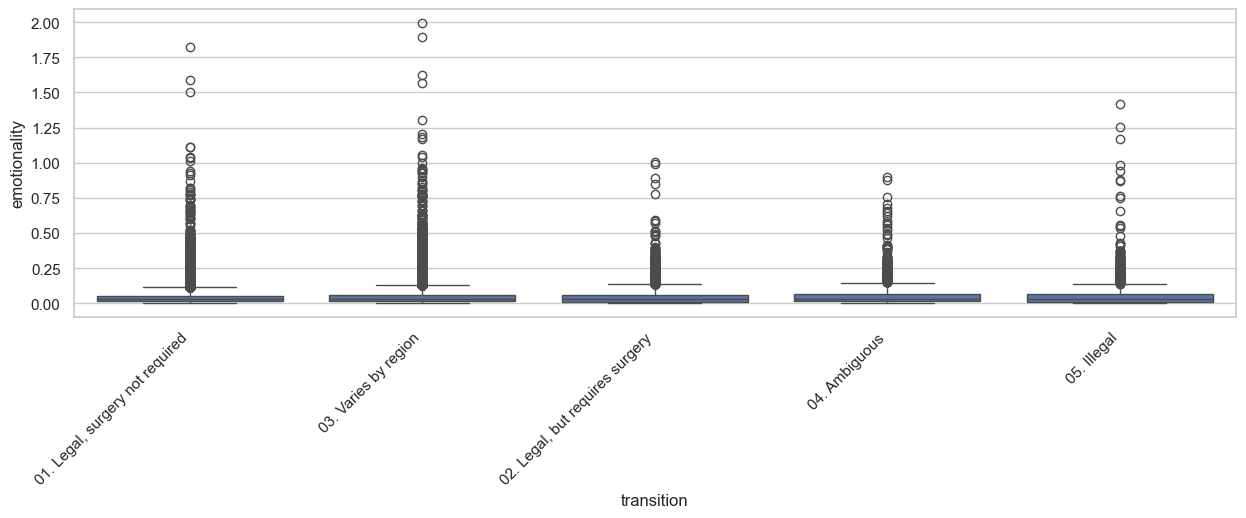

In [430]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.transition)
plt.xticks(rotation=45, ha="right");

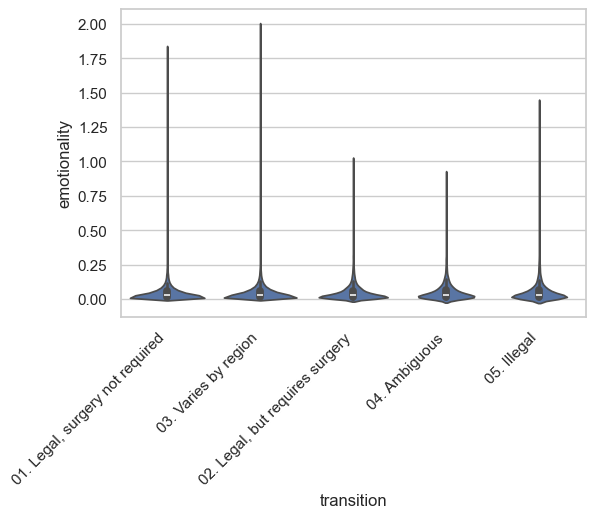

In [431]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.transition)
plt.xticks(rotation=45, ha="right");

In [435]:
results = smf.ols("emotionality ~ C(transition, Treatment('01. Legal, surgery not required'))", data = df).fit()
results.pvalues, results.params
# All significantly more emotionality than legal, surgery not required
# MOre emotionality if ambiguous or illegal

(Intercept                                                                                         0.000000e+00
 C(transition, Treatment('01. Legal, surgery not required'))[T.02. Legal, but requires surgery]    2.269335e-08
 C(transition, Treatment('01. Legal, surgery not required'))[T.03. Varies by region]               1.655319e-33
 C(transition, Treatment('01. Legal, surgery not required'))[T.04. Ambiguous]                      4.868938e-19
 C(transition, Treatment('01. Legal, surgery not required'))[T.05. Illegal]                        2.373737e-15
 dtype: float64,
 Intercept                                                                                         0.043486
 C(transition, Treatment('01. Legal, surgery not required'))[T.02. Legal, but requires surgery]    0.004025
 C(transition, Treatment('01. Legal, surgery not required'))[T.03. Varies by region]               0.003874
 C(transition, Treatment('01. Legal, surgery not required'))[T.04. Ambiguous]                      

In [437]:
results = smf.ols("emotionality ~ df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous'] + df_transcateg['transition_05. Illegal']", data = df_transcateg).fit()
results.pvalues, results.params
# Same conclusions

(Intercept                                                      0.000000e+00
 df_transcateg['transition_02. Legal, but requires surgery']    1.142476e-08
 df_transcateg['transition_03. Varies by region']               1.330923e-37
 df_transcateg['transition_04. Ambiguous']                      2.982746e-19
 df_transcateg['transition_05. Illegal']                        1.475294e-15
 dtype: float64,
 Intercept                                                      0.043413
 df_transcateg['transition_02. Legal, but requires surgery']    0.004098
 df_transcateg['transition_03. Varies by region']               0.003946
 df_transcateg['transition_04. Ambiguous']                      0.009302
 df_transcateg['transition_05. Illegal']                        0.008101
 dtype: float64)

 27  transition            139838 non-null  object 


# All the variables together

In [438]:
onehotencoder = preprocessing.OneHotEncoder()
regions_categ = onehotencoder.fit_transform(df[["region"]]).toarray()
encoded_df = pd.DataFrame(regions_categ, columns=onehotencoder.get_feature_names_out(["region"]))
df_categ = pd.concat([df, encoded_df], axis=1)

income_categ = onehotencoder.fit_transform(df[["income_group"]]).toarray()
encoded_df = pd.DataFrame(income_categ, columns=onehotencoder.get_feature_names_out(["income_group"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

censor_categ = onehotencoder.fit_transform(df[["censor"]]).toarray()
encoded_df = pd.DataFrame(censor_categ, columns=onehotencoder.get_feature_names_out(["censor"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

transition_categ = onehotencoder.fit_transform(df[["transition"]]).toarray()
encoded_df = pd.DataFrame(transition_categ, columns=onehotencoder.get_feature_names_out(["transition"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

df_categ.drop(["region", "income_group", "censor", "transition"], axis=1, inplace=True)
df_categ

id_web        lat        long  \
0            1  45.524600  -73.604493   
1            2  45.514617  -73.575139   
2            3  45.525991  -73.603195   
3            4  45.525713  -73.603528   
4            5  45.460612  -73.504457   
...        ...        ...         ...   
148710  711896  39.474226   -0.371138   
148711  711897  39.214083   23.018151   
148712  713055  50.442382 -104.357472   
148713  713056  50.705800    1.580838   
148714  713876  39.019485  -94.737419   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
148710                               Nuestro primer beso.       sl     0.0000   
148711  Και αναρωτιέμαι πως θα με κοίταζες... αν ήξερε...       el     0.0000   
148712  first time i was ever called a fag. this town ...       en    -0.8779   
148713  I was lost in my feelings, i met you, and i kn...       en     0.2011   
148714                         came out as nonbinary here       en     0.0000   

        type_sentiment  characters  emotionality              country_name  \
0                    1         173      0.039564                    Canada   
1                    3         508      0.170131                    Canada   
2                    3          47      0.011789                    Canada   
3                    3         250      0.084220                    Canada   
4                    3          93      0.022338                    Canada   
...                ...         ...           ...                       ...   
148710               2          20      0.003529                     Spain   
148711               2         142      0.025057                    Greece   
148712               1          81      0.026841                    Canada   
148713               3         352      0.074605                    France   
148714               2          26      0.004588  United States of America   

        ... censor_05. Fine as punishment  censor_06. State-enforced  \
0       ...                           0.0                        0.0   
1       ...                           0.0                        0.0   
2       ...                           0.0                        0.0   
3       ...                           0.0                        0.0   
4       ...                           0.0                        0.0   
...     ...                           ...                        ...   
148710  ...                           0.0                        0.0   
148711  ...                           0.0                        0.0   
148712  ...                           0.0                        0.0   
148713  ...                           0.0                        0.0   
148714  ...                           0.0                        0.0   

        censor_07. Imprisonment as punishment  censor_nan  \
0                                         0.0         0.0   
1                                         0.0         0.0   
2                                         0.0         0.0   
3                                         0.0         0.0   
4                                         0.0         0.0   
...                                       ...         ...   
148710                                    0.0         0.0   
148711                                    0.0         0.0   
148712                                    0.0         0.0   
148713                                    0.0         0.0   
148714                                    0.0         0.0   

       

In [443]:
df_categ.mean_stability

0         79.673529
1         79.673529
2         79.673529
3         79.673529
4         79.673529
            ...    
148710    63.466667
148711    46.600000
148712    79.673529
148713    55.000000
148714          NaN
Name: mean_stability, Length: 148715, dtype: float64

In [439]:
df_categ.columns

Index(['id_web', 'lat', 'long', 'comment', 'language', 'sentiment',
       'type_sentiment', 'characters', 'emotionality', 'country_name',
       'country_code', 'mean_stability', 'mean_law', 'mean_female_seats',
       'mean_voice', 'mean_gdp', 'mean_children_out', 'mean_ed_exp',
       'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp',
       'mean_UHC_coverage', 'mean_rights', 'mean_sex_index',
       'mean_hate_protection', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'region_nan',
       'income_group_High income', 'income_group_Low income',
       'income_group_Lower middle income', 'income_group_Upper middle income',
       'income_group_nan', 'censor_01. No censorship',
       'censor_02. Varies by region', 'censor_03. Ambiguous',
       'censor_04. Other punishment', 'censor_05. Fine as pu

In [457]:
df[['mean_stability', 'mean_law', 'mean_female_seats', 'mean_voice', 'mean_gdp', 'mean_children_out', 'mean_ed_exp',
    'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp', 'mean_UHC_coverage', 'mean_rights', 'mean_sex_index',
    'mean_hate_protection']].corr()
# mean_ARV_coverage and mean_stability have a corr of 1
# mean_ARV_coverage out of the model

mean_stability  mean_law  mean_female_seats  mean_voice  \
mean_stability              1.000000  0.597511           0.647777    0.600653   
mean_law                    0.597511  1.000000           0.448820    0.845018   
mean_female_seats           0.647777  0.448820           1.000000    0.499650   
mean_voice                  0.600653  0.845018           0.499650    1.000000   
mean_gdp                    0.251896  0.275220           0.154304    0.280470   
mean_children_out          -0.217923 -0.642128          -0.257942   -0.492665   
mean_ed_exp                 0.454459  0.457293           0.568397    0.638539   
mean_literacy               0.351657  0.642386           0.009850    0.475361   
mean_ARV_coverage           1.000000  0.597511           0.647777    0.600653   
mean_health_exp             0.475857  0.563401           0.537608    0.724224   
mean_UHC_coverage           0.461749  0.790824           0.236985    0.678636   
mean_rights                 0.635416  0.711266           0.545210    0.771204   
mean_sex_index             -0.378570 -0.446112          -0.103949   -0.375482   
mean_hate_protection        0.622826  0.579372           0.287408    0.590322   

                      mean_gdp  mean_children_out  mean_ed_exp  mean_literacy  \
mean_stability        0.251896          -0.217923     0.454459       0.351657   
mean_law              0.275220          -0.642128     0.457293       0.642386   
mean_female_seats     0.154304          -0.257942     0.568397       0.009850   
mean_voice            0.280470          -0.492665     0.638539       0.475361   
mean_gdp              1.000000          -0.277266     0.155054       0.153175   
mean_children_out    -0.277266           1.000000    -0.320642      -0.676424   
mean_ed_exp           0.155054          -0.320642     1.000000       0.211376   
mean_literacy         0.153175          -0.676424     0.211376       1.000000   
mean_ARV_coverage     0.251896          -0.217923     0.454459       0.351657   
mean_health_exp       0.441118          -0.405743     0.770067       0.214297   
mean_UHC_coverage     0.300183          -0.745640     0.333454       0.851862   
mean_rights           0.335850          -0.514612     0.651008       0.451126   
mean_sex_index       -0.168928           0.402951    -0.288637      -0.560765   
mean_hate_protection  0.153802          -0.398244     0.473388       0.448329   

                      mean_ARV_coverage  mean_health_exp  mean_UHC_coverage  \
mean_stability                 1.000000         0.475857           0.461749   
mean_law                       0.597511         0.563401           0.790824   
mean_female_seats              0.647777         0.537608           0.236985   
mean_voice                     0.600653         0.724224           0.678636   
mean_gdp                       0.251896         0.441118           0.300183   
mean_children_out             -0.217923        -0.405743          -0.745640   
mean_ed_exp                    0.454459         0.770067           0.333454   
mean_literacy                  0.351657         0.214297           0.851862   
mean_ARV_coverage              1.000000         0.475857           0.461749   
mean_health_exp                0.475857         1.000000           0.463579   
mean_UHC_coverage              0.461749         0.463579           1.000000   
mean_rights                    0.635416         0.743903           0.698075   
mean_sex_index                -0.378570        -0.377879          -0.567855   
mean_hate_protection           0.622826         0.503352           0.646958   

                      mean_rights  mean_sex_index  mean_hate_protection  
mean_stability           0.635416       -0.378570              0.622826  
mean_law                 0.711266       -0.446112              0.579372  
mean_female_seats        0.545210       -0.103949              0.287408  
mean_voice               0.771204       -0.375482              0.590322  
mean_gdp                 0.335850 

## Discourse as sentiment

In [453]:
results = smf.ols("sentiment ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_East Asia & Pacific'] + df_categ['region_Europe & Central Asia']  + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_High income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['censor_07. Imprisonment as punishment'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()
# Reference categories: 'region_Latin America & Caribbean', 'income_group_Low income', 'censor_04. Other punishment', 'transition_05. Illegal'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.199
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.58e-26
Time:                        20:43:05   Log-Likelihood:                -36937.
No. Observations:               55956   AIC:                         7.394e+04
Df Residuals:                   55923   BIC:                         7.424e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.3130      0.063      4.995      0.000       0.190       0.436
mean_stability                                            -0.0005      0.000     -2.174      0.030      -0.001   -4.95e-05
mean_law                                                   0.0005      0.000      1.901      0.057   -1.66e-05       0.001
mean_female_seats                                       5.516e-05      0.000      0.152      0.879      -0.001       0.001
mean_voice                                                 0.0003      0.000      1.658      0.097   -6.07e-05       0.001
mean_gdp                                                 -5.2e-15   4.94e-15     -1.053      0.292   -1.49e-14    4.48e-15
mean_children_out                                         -0.0011      0.001     -1.333      0.183      -0.003       0.001
mean_ed_exp                                               -0.0013      0.002     -0.528      0.597      -0.006       0.003
mean_literacy                                          -2.818e-05      0.000     -0.064      0.949      -0.001       0.001
mean_health_exp                                           -0.0007      0.002     -0.291      0.771      -0.005       0.004
mean_UHC_coverage                                         -0.0013      0.001     -2.627      0.009      -0.002      -0.000
mean_rights                                               -0.0006      0.002     -0.266      0.790      -0.005       0.004
mean_sex_index                                             0.0744      0.025      3.014      0.003       0.026       0.123
mean_hate_protection                                       0.0433      0.015      2.811      0.005       0.013       0.073
df_categ['region_East Asia & Pacific']                     0.0081      0.017      0.487      0.626      -0.024       0.041
df_categ['region_Europe & Central Asia']                   0.0239      0.013      1.856      0.063      -0.001       0.049
df_categ['region_Middle East & North Africa']             -0.0152      0.022     -0.687      0.492      -0.058       0.028
df_categ['region_North America']                          -0.0120      0.015     -0.795      0.427      -0.042       0.018
df_categ['region_South Asia']                              0.0573      0.026      2.206      0.027       0.006       0.108
df_categ['region_Sub-Saharan Africa']                      0.0726      0.040      1.815      0.070      -0.006       0.151
df_categ['income_group_High income']                       0.1307      0.044      2.940      0.003       0.044       0.218
df_categ['income_group_Lower middle income']               0.1354      0.044      3.095      0.002       0.050       0.221
df_categ

Without imputations, the variables that are associated with sentiment are:
- mean_stability (negatively, tinny bit)
- mean_UHC_coverage (negatively, tinny bit)
- mean_sex_index (possitively)
- mean_hate_protection (possitively)
- region (only possitively significant for South Asia, having as reference Latin America & Caribbean)
- income_group (possitively, having as reference Low income)
- transition (only negative significant for "Legal, surgery not required" and "Varies by region", having as reference Illegal

**R-squared superlow**

In [455]:
results = smf.ols("sentiment ~ mean_stability + mean_UHC_coverage + mean_sex_index + mean_hate_protection + df_categ['region_East Asia & Pacific'] + df_categ['region_Europe & Central Asia']  + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_High income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()
# A bit worse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.136
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.43e-24
Time:                        20:44:29   Log-Likelihood:                -37366.
No. Observations:               56492   AIC:                         7.477e+04
Df Residuals:                   56474   BIC:                         7.493e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.2610      0.046      5.698      0.000       0.171       0.351
mean_stability                                            -0.0003      0.000     -1.461      0.144      -0.001    8.62e-05
mean_UHC_coverage                                         -0.0003      0.000     -1.467      0.142      -0.001       0.000
mean_sex_index                                             0.0635      0.016      3.958      0.000       0.032       0.095
mean_hate_protection                                       0.0395      0.009      4.545      0.000       0.022       0.057
df_categ['region_East Asia & Pacific']                     0.0256      0.014      1.836      0.066      -0.002       0.053
df_categ['region_Europe & Central Asia']                   0.0374      0.011      3.324      0.001       0.015       0.059
df_categ['region_Middle East & North Africa']             -0.0306      0.016     -1.944      0.052      -0.062       0.000
df_categ['region_North America']                           0.0035      0.012      0.295      0.768      -0.020       0.027
df_categ['region_South Asia']                              0.0843      0.021      4.005      0.000       0.043       0.126
df_categ['region_Sub-Saharan Africa']                      0.0661      0.035      1.872      0.061      -0.003       0.135
df_categ['income_group_High income']                       0.1278      0.040      3.164      0.002       0.049       0.207
df_categ['income_group_Lower middle income']               0.1249      0.040      3.128      0.002       0.047       0.203
df_categ['income_group_Upper middle income']               0.1110      0.040      2.755      0.006       0.032       0.190
df_categ['transition_01. Legal, surgery not required']    -0.0210      0.011     -1.995      0.046      -0.042      -0.000
df_categ['transition_02. Legal, but requires surgery']     0.0068      0.012      0.590      0.555      -0.016       0.029
df_categ['transition_03. Varies by region']               -0.0353      0.016     -2.262      0.024      -0.066      -0.005
df_categ['transition_04. Ambiguous']                       0.0157      0.014      1.144      0.252      -0.011       0.043
==============================================================================
Omnibus:                     4018.817   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4184.751
Skew:                          -0.624   Prob(JB):                         0.00
Kurtosis:                       2.533   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Error

## Discourse as type_sentiment

In [456]:
results = smf.mnlogit("type_sentiment ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_East Asia & Pacific'] + df_categ['region_Europe & Central Asia']  + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_High income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['censor_07. Imprisonment as punishment'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.852936
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         type_sentiment   No. Observations:                55956
Model:                        MNLogit   Df Residuals:                    55890
Method:                           MLE   Df Model:                           64
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                0.007495
Time:                        20:44:40   Log-Likelihood:                -47727.
converged:                       True   LL-Null:                       -48087.
Covariance Type:            nonrobust   LLR p-value:                7.222e-112
==========================================================================================================================
                                      type_sentiment=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.2744      0.463      0.592      0.554      -0.633       1.182
mean_stability                                             0.0036      0.002      2.005      0.045    7.94e-05       0.007
mean_law                                                   0.0094      0.002      4.438      0.000       0.005       0.014
mean_female_seats                                         -0.0061      0.003     -2.202      0.028      -0.012      -0.001
mean_voice                                                -0.0102      0.002     -6.686      0.000      -0.013      -0.007
mean_gdp                                               -7.201e-14    3.7e-14     -1.949      0.051   -1.44e-13    4.11e-16
mean_children_out                                          0.0174      0.006      2.839      0.005       0.005       0.029
mean_ed_exp                                                0.0537      0.018      2.914      0.004       0.018       0.090
mean_literacy                                             -0.0025      0.003     -0.725      0.468      -0.009       0.004
mean_health_exp                                           -0.0184      0.018     -1.047      0.295      -0.053       0.016
mean_UHC_coverage                                          0.0099      0.004      2.620      0.009       0.002       0.017
mean_rights                                                0.0123      0.017      0.731      0.465      -0.021       0.045
mean_sex_index                                            -0.2206      0.191     -1.154      0.248      -0.595       0.154
mean_hate_protection                                       0.0167      0.116      0.143      0.886      -0.211       0.245
df_categ['region_East Asia & Pacific']                    -0.1746      0.126     -1.391      0.164      -0.421       0.071
df_categ['region_Europe & Central Asia']                   0.0998      0.095      1.049      0.294      -0.087       0.286
df_categ['region_Middle East & North Africa']             -0.2592      0.167     -1.554      0.120      -0.586       0.068
df_categ['region_North America']                          -0.3707      0.112     -3.318      0.001      -0.590      -0.152
df_categ['region_South Asia']                             -0.3428      0.200     -1.717      0.086      -0.734       0.049
df_categ['region_Sub-Saharan Africa']                     -0.2384      0.316     -0.754      0.451      -0.858       0.381
df_categ['income_group_High income']                      -0.7741      0.319     -2.428      0.015      -1.399      -0.149
df_categ['income_group_Lower middle income']              -0.5709      0.314     -1.816      0.069      -1.187       0.045
df_categ['income_group_Upper middle income']              -0.6052      0.330     -1.831      0.067      -1.253       0.042
df_categ['censor_01. No censorship']       

Without imputations, the variables that are associated with neutral sentiment having negative sentiment as reference are:
- mean_law (possitively)
- mean_female_seats (negatively)
- mean_voice (negatively)
- mean_children_out (possitvely)
- mean_ed_exp (possitvely)
- mean_UHC_coverage (possitvely)
- region (negatively in North America, having as reference Latin America & Caribbean)
- income_group (negatively having as reference Low income)
- censor (positively for ambiguous, having as reference Other punishment)
- transition (positivee for legal (surgery required and not), negative for ambiguous, having as reference Illegal)

Without imputations, the variables that are associated with positive sentiment having negative sentiment as reference are:
- mean_law (possitively)
- region (positively in Europe and Central Asia, having as reference Latin America & Caribbean)
- censor (negative for imprisonment as punishment having as refrence Other punishment

## Discourse as emotionality

In [459]:
results = smf.ols("emotionality ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_East Asia & Pacific'] + df_categ['region_Europe & Central Asia']  + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_High income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['censor_07. Imprisonment as punishment'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()
# Reference categories: 'region_Latin America & Caribbean', 'income_group_Low income', 'censor_04. Other punishment', 'transition_05. Illegal'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           emotionality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     17.06
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.74e-94
Time:                        20:57:07   Log-Likelihood:                 80370.
No. Observations:               55956   AIC:                        -1.607e+05
Df Residuals:                   55923   BIC:                        -1.604e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.0426      0.008      5.527      0.000       0.027       0.058
mean_stability                                         -7.342e-05   2.85e-05     -2.578      0.010      -0.000   -1.76e-05
mean_law                                               -1.982e-05   3.43e-05     -0.578      0.564   -8.71e-05    4.74e-05
mean_female_seats                                       8.922e-05   4.45e-05      2.006      0.045    2.05e-06       0.000
mean_voice                                              2.236e-05   2.47e-05      0.905      0.365    -2.6e-05    7.08e-05
mean_gdp                                                1.811e-15   6.07e-16      2.984      0.003    6.21e-16       3e-15
mean_children_out                                      -9.916e-05   9.85e-05     -1.007      0.314      -0.000    9.39e-05
mean_ed_exp                                                0.0004      0.000      1.465      0.143      -0.000       0.001
mean_literacy                                          -2.709e-05    5.4e-05     -0.502      0.616      -0.000    7.87e-05
mean_health_exp                                           -0.0009      0.000     -3.251      0.001      -0.001      -0.000
mean_UHC_coverage                                       1.169e-05   6.15e-05      0.190      0.849      -0.000       0.000
mean_rights                                               -0.0008      0.000     -2.911      0.004      -0.001      -0.000
mean_sex_index                                            -0.0026      0.003     -0.857      0.392      -0.009       0.003
mean_hate_protection                                       0.0059      0.002      3.128      0.002       0.002       0.010
df_categ['region_East Asia & Pacific']                    -0.0059      0.002     -2.883      0.004      -0.010      -0.002
df_categ['region_Europe & Central Asia']                  -0.0121      0.002     -7.621      0.000      -0.015      -0.009
df_categ['region_Middle East & North Africa']             -0.0124      0.003     -4.553      0.000      -0.018      -0.007
df_categ['region_North America']                          -0.0042      0.002     -2.257      0.024      -0.008      -0.001
df_categ['region_South Asia']                             -0.0029      0.003     -0.918      0.359      -0.009       0.003
df_categ['region_Sub-Saharan Africa']                      0.0026      0.005      0.527      0.598      -0.007       0.012
df_categ['income_group_High income']                       0.0146      0.005      2.677      0.007       0.004       0.025
df_categ['income_group_Lower middle income']               0.0197      0.005      3.671      0.000       0.009       0.030
df_categ

Without imputations, the variables that are associated with emotionality are:
- mean_stability (negatively, tinny bit)
- mean_female_seats (possitively, tinny bit)
- mean_gdp (positively, tinny bit)
- mean_health_exp (negatively, tinny bit)
- mean_rights (negatively, tinny bit)
- mean_hate_protection (possitvely)
- region (negatively for East Asia & Pacific, Europe & Central Asia, Middle East & North Africa and North America, having as reference Latin America and Caribbean
- income (positively for all groups having as reference Low income)
- censor (possitvely for no censorship and for state-enforced)
- transition (negatively for Legal, surgery not required, Legal, but requires surgery and Varies by region, having as reference Illegal.

**R-squared very low, but less than looking only at sentiment**